#**Import Library**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#**Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Preprocessing**

##Load Data

In [3]:
#Load data
df = pd.read_csv('drive/MyDrive/Portofolio Data/Home Credit Indonesia/application_train.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

##Cek missing values dan hapus kolom

In [5]:
df_mv = df.copy()

In [6]:
null = df_mv.isnull().sum()
percent_missing = null *100/len(df_mv)
dtypes = [df_mv[col].dtype for col in df_mv.columns]
df_table_mv = pd.DataFrame({'null' : null,
                          'data_type' : dtypes,
                          'percent_missing' : percent_missing})
df_table_mv.sort_values('percent_missing', ascending = False, inplace = True)
mv = df_table_mv[df_table_mv['percent_missing']>0].reset_index()
mv

index    null data_type  percent_missing
0            COMMONAREA_MEDI  214865   float64        69.872297
1             COMMONAREA_AVG  214865   float64        69.872297
2            COMMONAREA_MODE  214865   float64        69.872297
3   NONLIVINGAPARTMENTS_MODE  213514   float64        69.432963
4    NONLIVINGAPARTMENTS_AVG  213514   float64        69.432963
..                       ...     ...       ...              ...
62              EXT_SOURCE_2     660   float64         0.214626
63           AMT_GOODS_PRICE     278   float64         0.090403
64               AMT_ANNUITY      12   float64         0.003902
65           CNT_FAM_MEMBERS       2   float64         0.000650
66    DAYS_LAST_PHONE_CHANGE       1   float64         0.000325

[67 rows x 4 columns]

In [7]:
# menghapus kolom yang memiliki lebih dari 35% nilai yang hilang
df_35 = df_table_mv.loc[df_table_mv['percent_missing']>35].index.tolist()
df_35

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [8]:
def col_full_null(df_mv):
    df_mv.drop(columns=df_35, inplace =True)

In [9]:
col_full_null(df_mv)
df_mv.shape

(307511, 73)

##Exploratory Data Analysis (EDA)

In [10]:
df_eda = df_mv.copy()
df_eda.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [11]:
num = df_eda.select_dtypes(include='number').columns
cat = df_eda.select_dtypes(include='object').columns

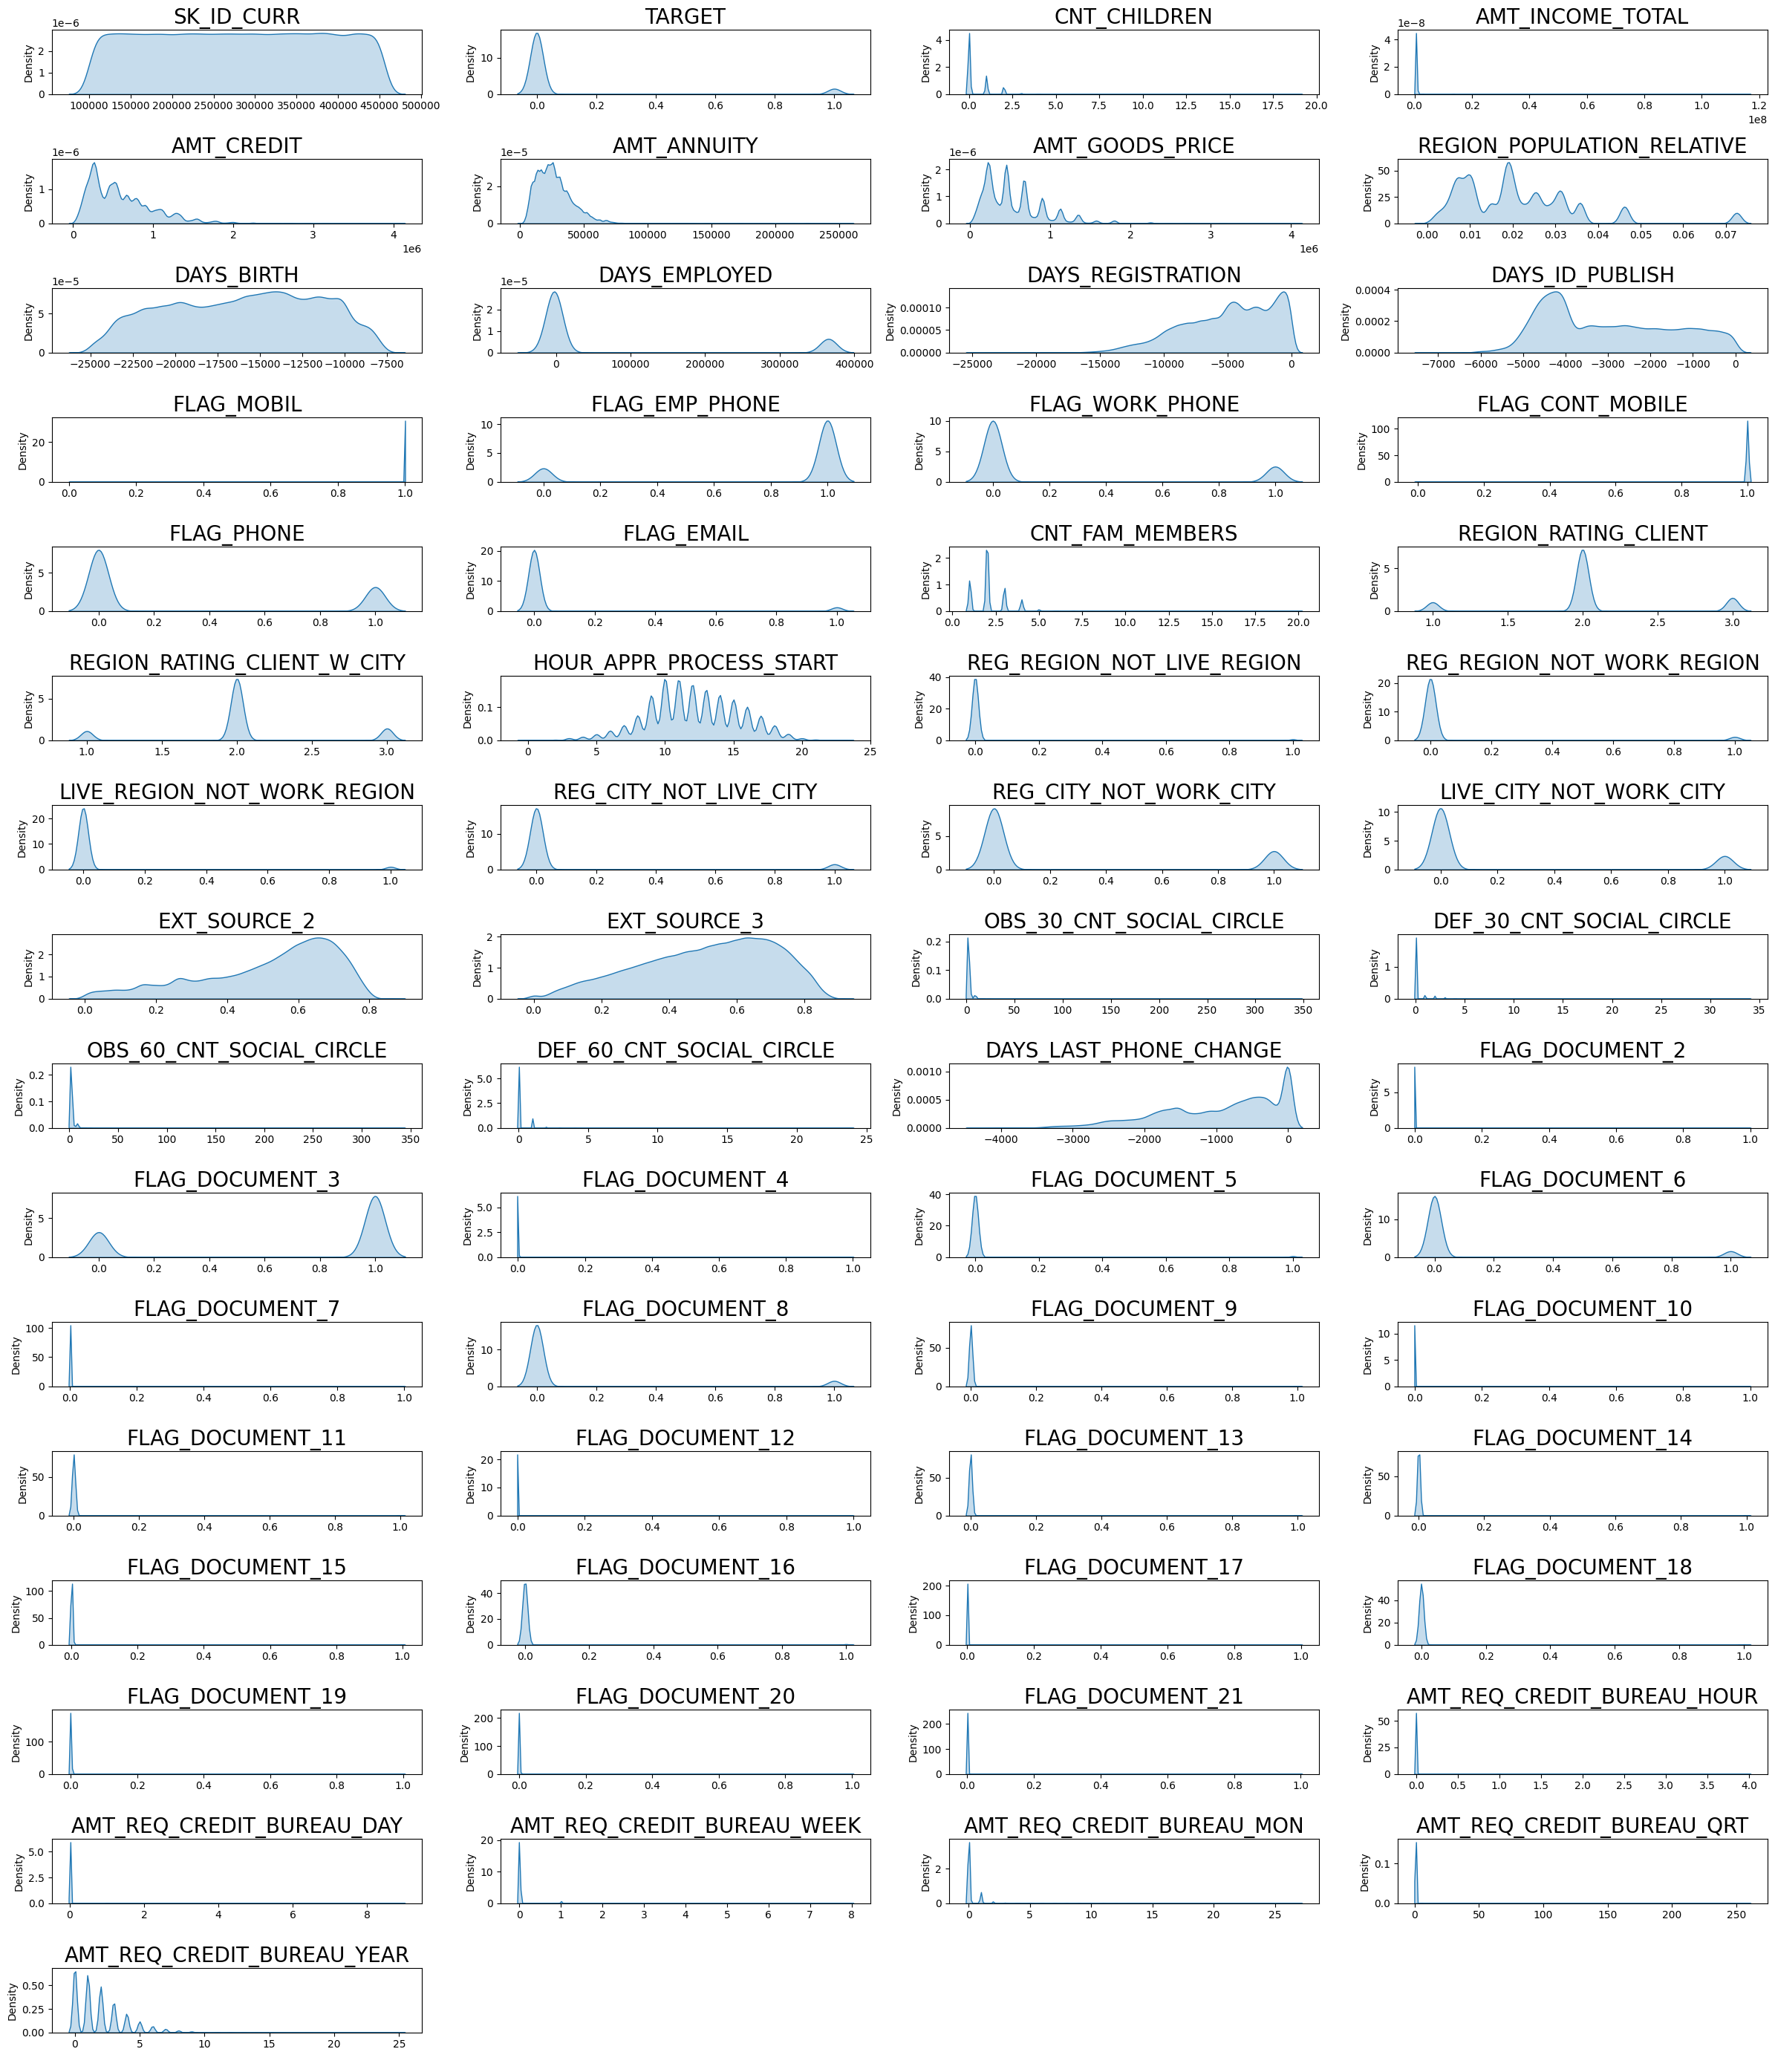

In [12]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(16,4,i+1)
    sns.kdeplot(x=df_eda[num[i]], palette='magma', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

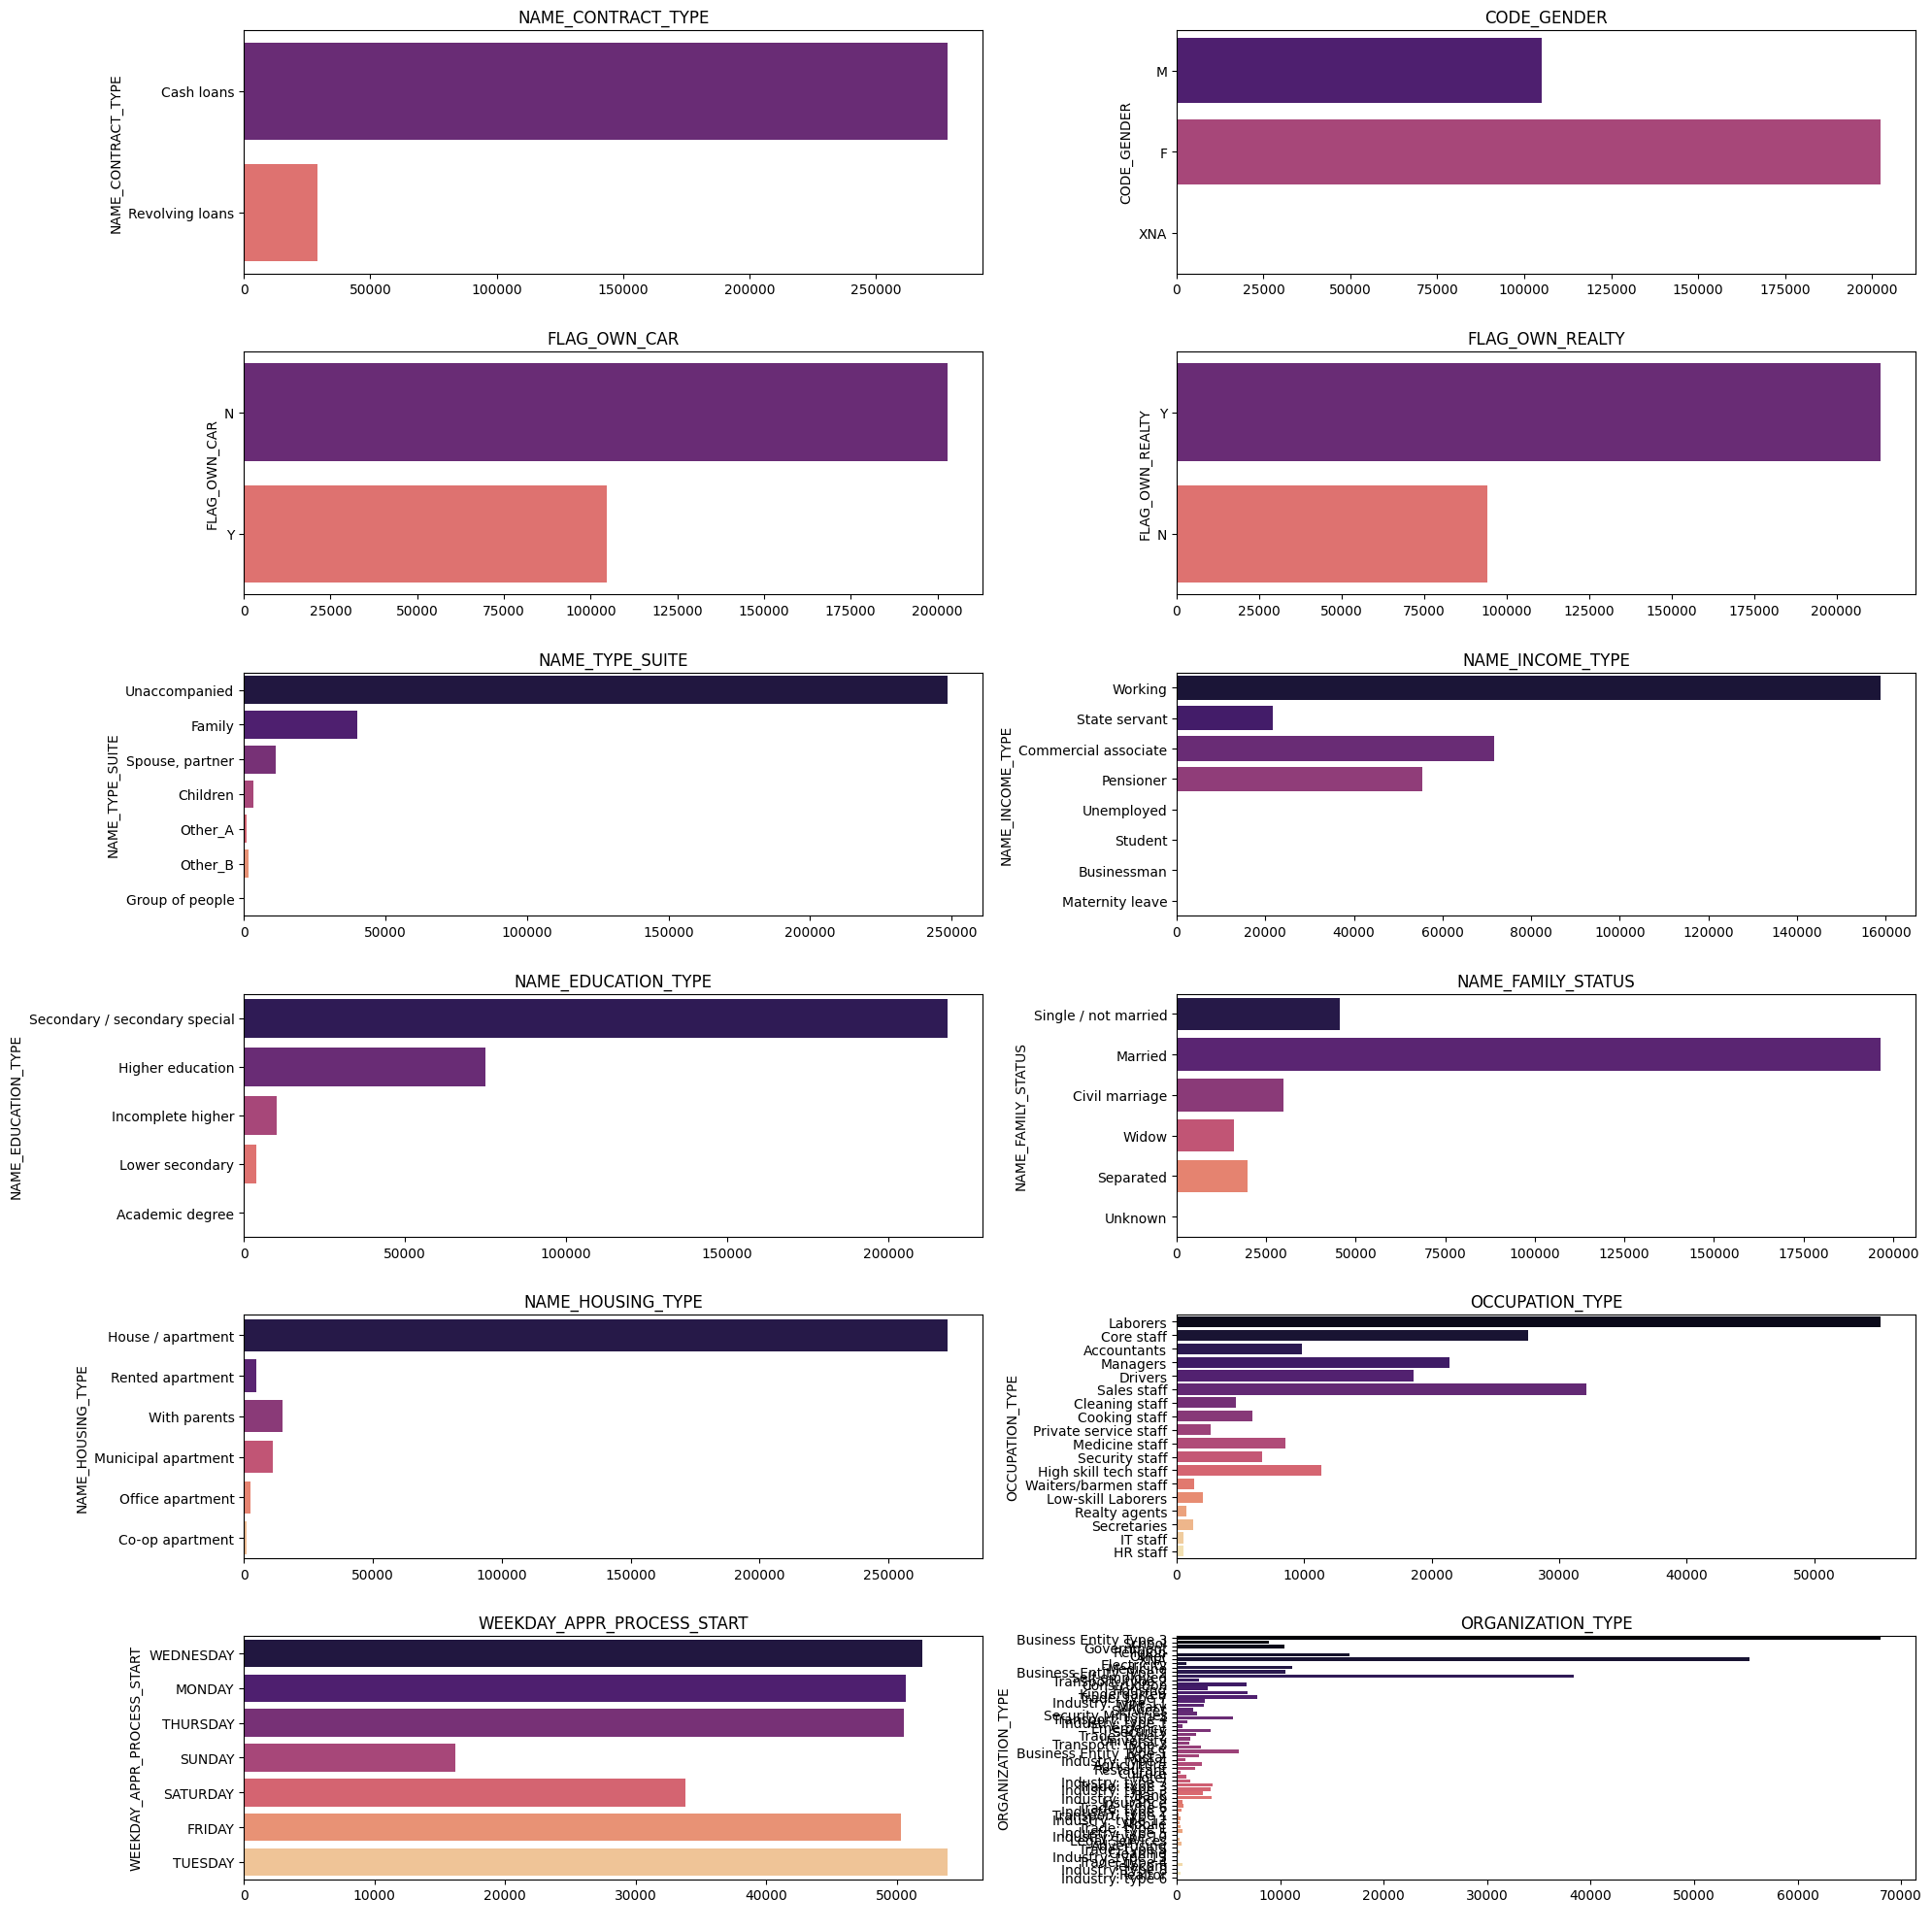

In [13]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(6,2,i+1)
    sns.countplot(y=df_eda[cat[i]], orient = 'h',palette='magma')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

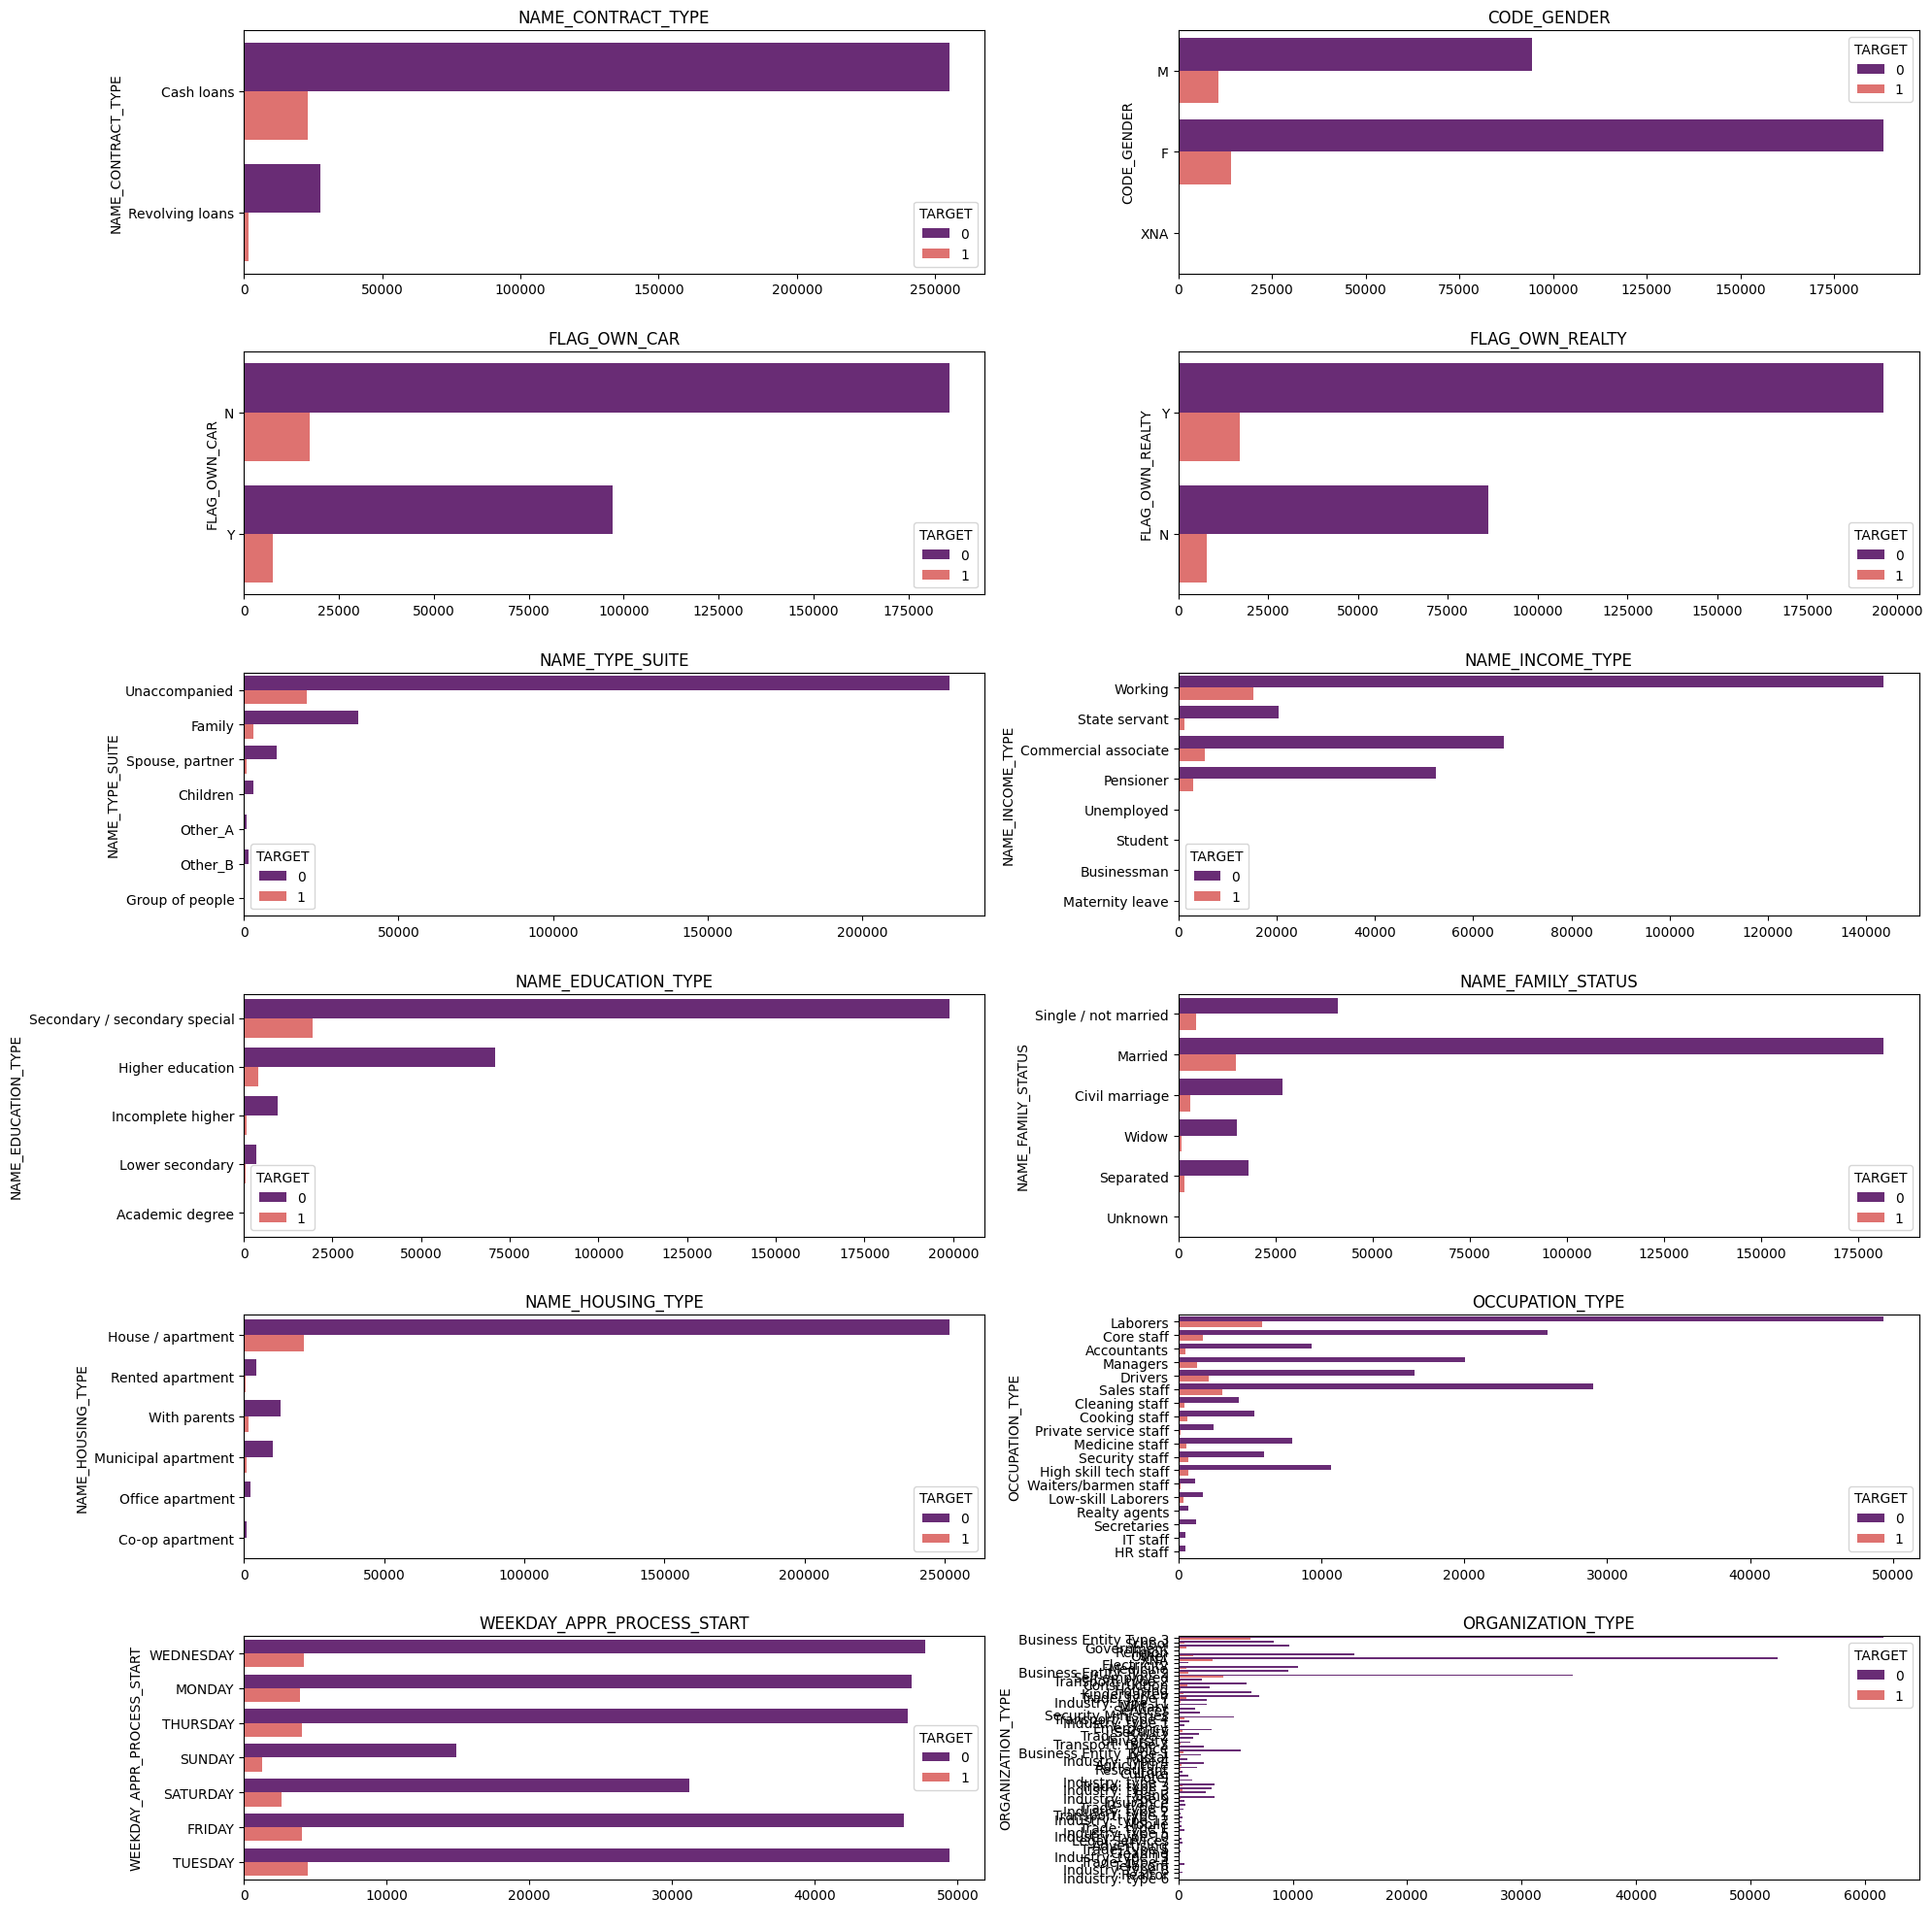

In [14]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(6,2,i+1)
    sns.countplot(y=df_eda[cat[i]], palette='magma', hue=df_eda['TARGET'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

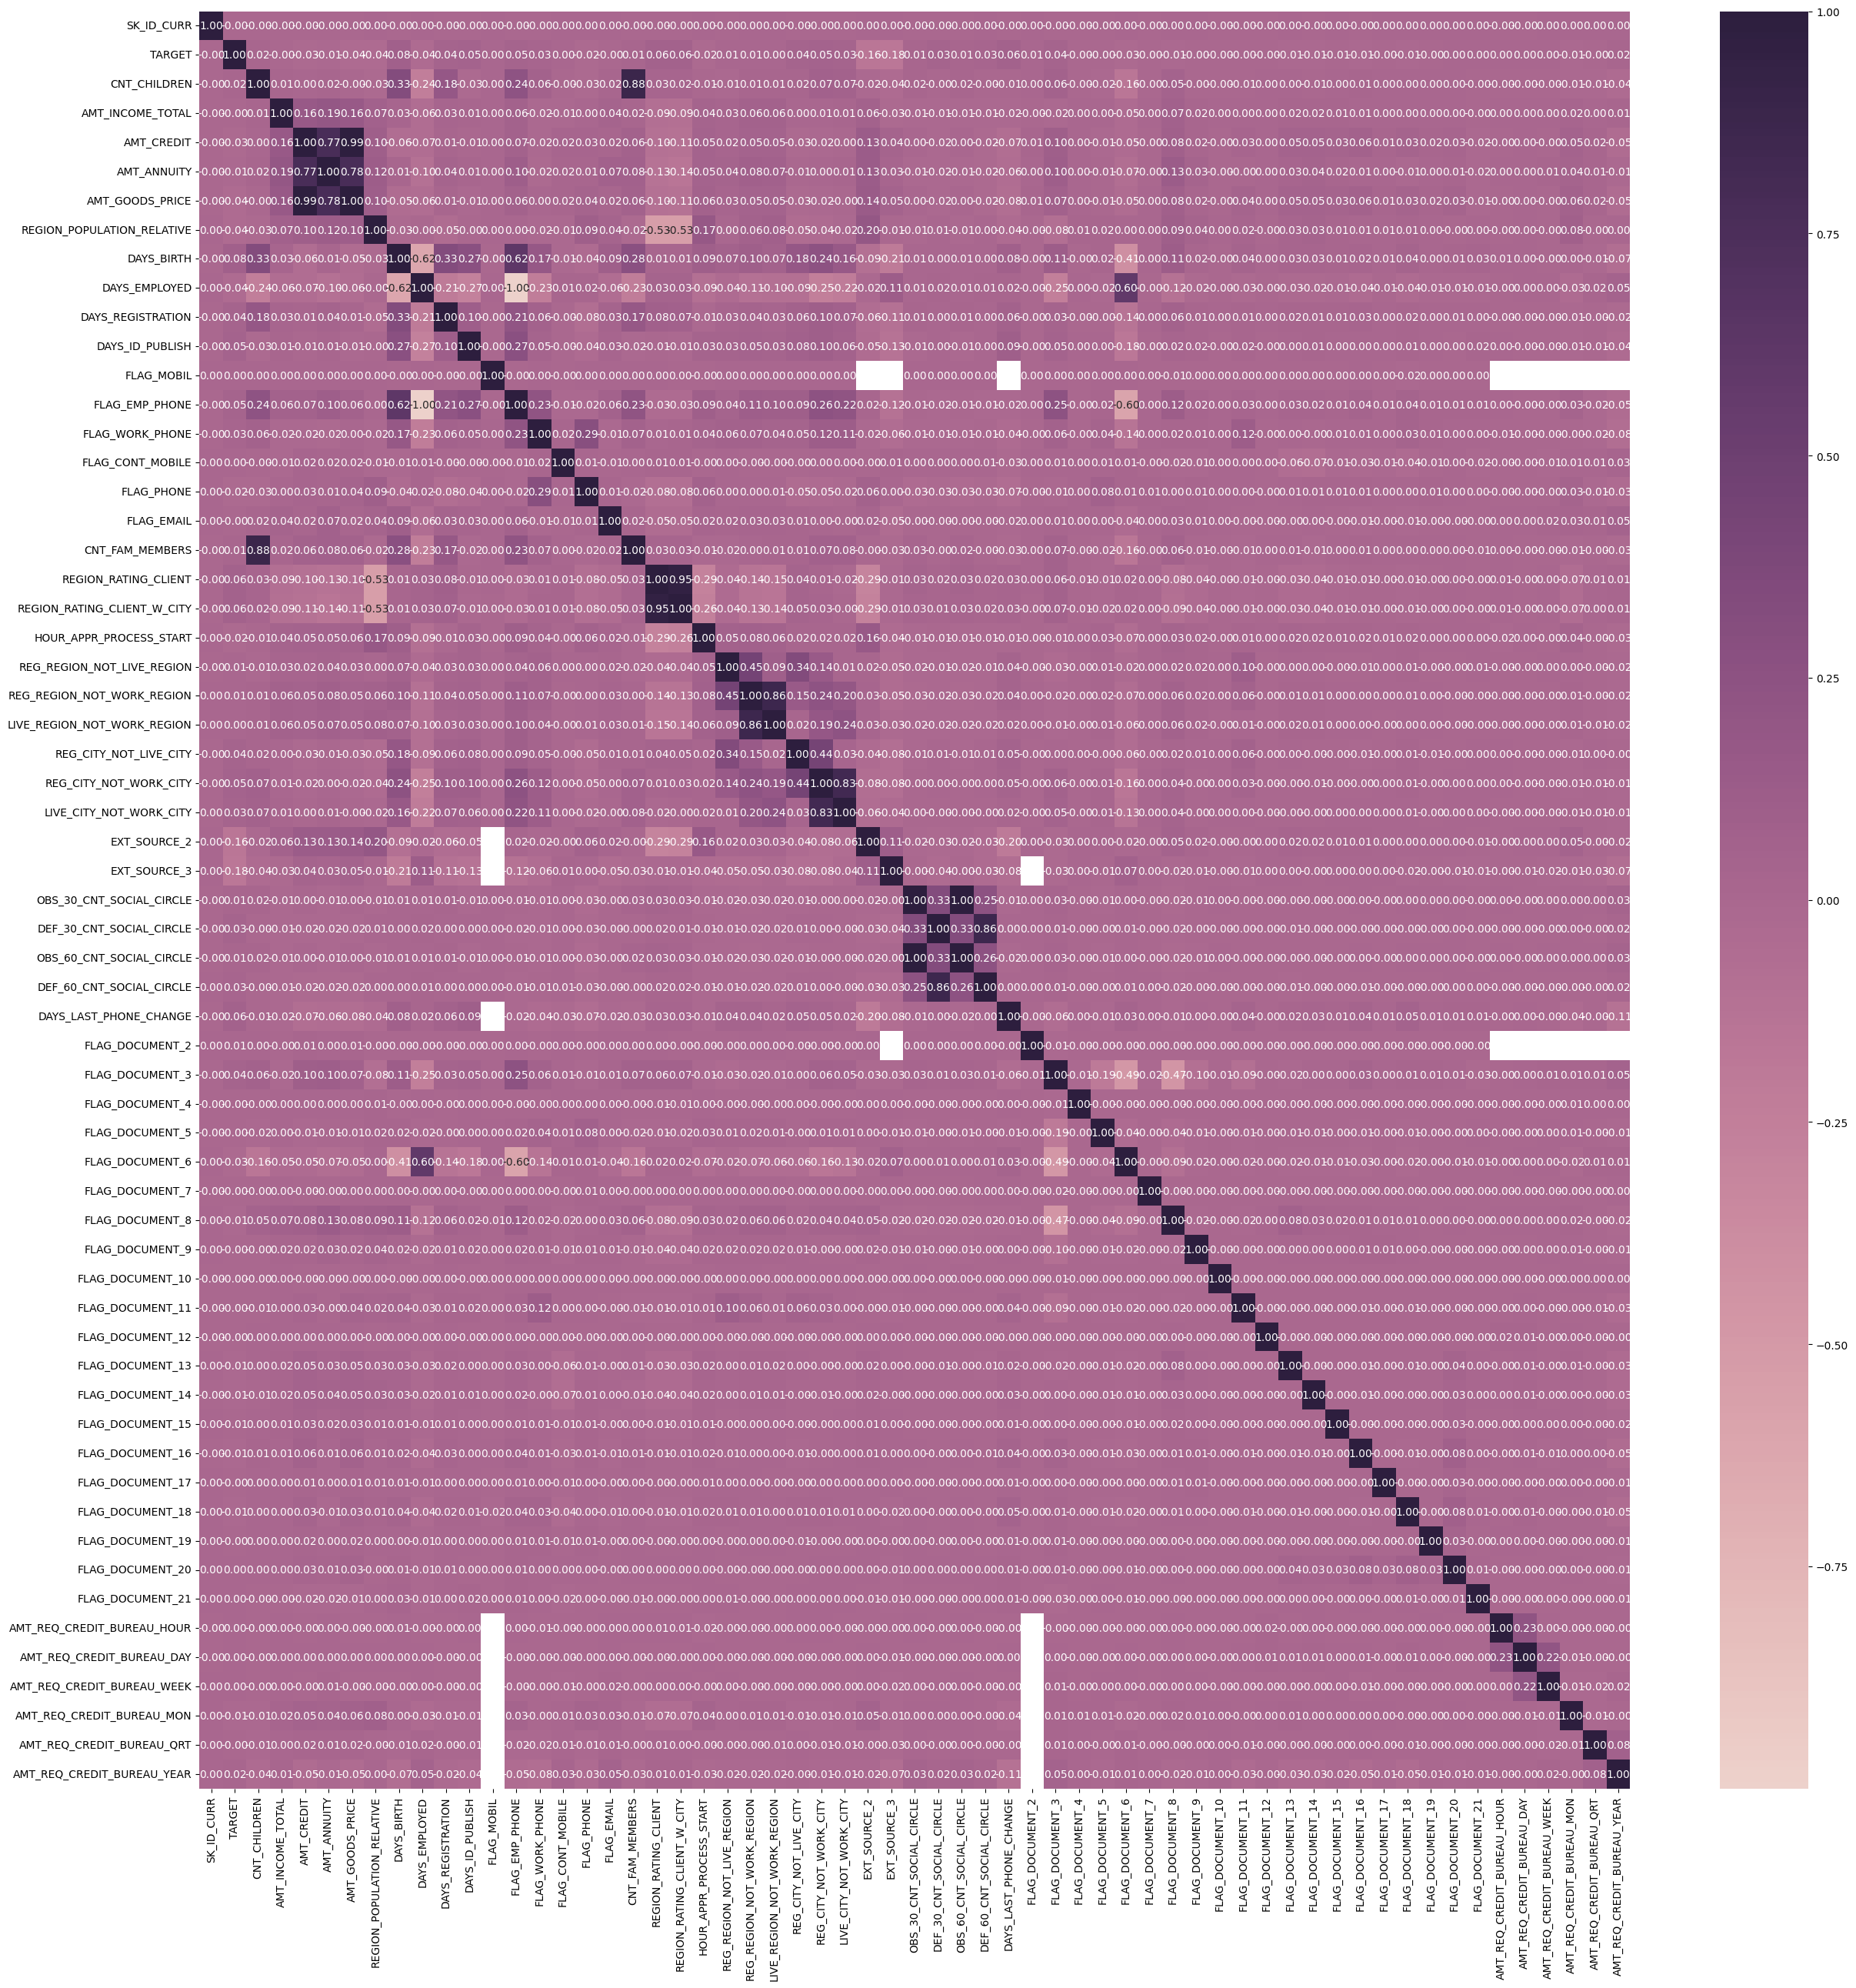

In [15]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_eda.corr(),cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='.2f')
plt.show()

#**Preprocessing**

In [16]:
df_preprocessing = df_eda.copy()

In [17]:
def preprocessing(df):
    # List drop feature because have high cardinality,high correlation,unnecesarry for credit risk,and majority on 0 value
    list_drop = ['ORGANIZATION_TYPE', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_MOBIL', 'REGION_RATING_CLIENT_W_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION']
    
    df.drop(columns=list_drop, inplace = True)
    
    # Fill Numeric Null Value
    list_num = ['AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_GOODS_PRICE']
    for num in list_num:
        df[num] = df[num].fillna(df[num].median())
        
    # EXT_SORUCE   
    list_ext = ['EXT_SOURCE_3','EXT_SOURCE_2']
    for ext in list_ext:
        df[ext] = df[ext].fillna(0)
    
    #Fill Category Null Value
    list_cat = ['NAME_TYPE_SUITE']
    for cat in list_cat:
        df[cat] = df[cat].fillna(df[cat].mode()[0])
    df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Other')
    
    # Create new feature
    df['AGE'] = round((df['DAYS_BIRTH'].abs()/365),0)
    df['EMP_LENGTH'] = round((df['DAYS_EMPLOYED'].abs()/365),0)
    df['REGIST_LENGTH'] = round((df['DAYS_REGISTRATION'].abs()/365),0)
    df['PUBLISH_LENGTH'] = round((df['DAYS_ID_PUBLISH'].abs()/365),0)
    df['PHONE_CHANGE_LENGTH'] = round((df['DAYS_LAST_PHONE_CHANGE'].abs()/365),0)
    list_new_feature = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
    df.drop(columns= list_new_feature, inplace = True)
    
    # Replace other to non dominant values in categorical
    df['NAME_TYPE_SUITE'].replace(to_replace = ['Other_B','Other_A','Group of people'], value = 'Other', inplace = True)
    df['NAME_INCOME_TYPE'].replace(to_replace = ['Unemployed','Student','Businessman','Maternity leave'], value = 'Other', inplace = True)
    df['NAME_FAMILY_STATUS'].replace(to_replace = ['Civil marriage','Unknown'], value = 'Married', inplace = True)
    df['NAME_HOUSING_TYPE'].replace(to_replace = ['Municipal apartment','Rented apartment','Office apartment','Co-op apartment'], value = 'Other', inplace = True)
    
    # Occupation Type
    office = ['IT staff','HR staff','Secretaries','Accountants','High skill tech staff','Managers','Sales staff','Core staff','Realty agents']
    service = ['Waiters/barmen staff','Private service staff','Cleaning staff','Cooking staff','Security staff','Medicine staff','Drivers']
    labour = ['Low-skill Laborers','Laborers']
    df['OCCUPATION_TYPE'].replace(to_replace = office, value = 'Office Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = service, value = 'Service Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = labour, value = 'Labour Job', inplace = True)
    
    # Adjuctic value to numeric
    # NAME_CONTRACT_TYPE (1 = Cash loans, 0 = Revolving loans)
    df['NAME_CONTRACT_TYPE'] = np.where(df['NAME_CONTRACT_TYPE']=='Cash loans',1,0)
    # CODE GENDER (1 = M, 0 = F)
    df['CODE_GENDER'] = np.where(df['CODE_GENDER']=='M',1,0)
    # FLAG_OWN_CAR (Y = 1, N = 0)
    df['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR']=='Y',1,0)
    # FLAG_OWN_REALTY (Y = 1, N = 0)
    df['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY']=='Y',1,0)
    
    # Drop Row that contain XNA in code gender
    df = df.drop(df[df['CODE_GENDER'] == 'XNA'].index,inplace = True)

In [18]:
preprocessing(df_preprocessing)

In [19]:
df_preprocessing.describe().T

count           mean            std  \
SK_ID_CURR                   307511.0  278180.518577  102790.175348   
TARGET                       307511.0       0.080729       0.272419   
NAME_CONTRACT_TYPE           307511.0       0.904787       0.293509   
CODE_GENDER                  307511.0       0.341643       0.474261   
FLAG_OWN_CAR                 307511.0       0.340108       0.473746   
FLAG_OWN_REALTY              307511.0       0.693673       0.460968   
CNT_CHILDREN                 307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL             307511.0  168797.919297  237123.146279   
AMT_CREDIT                   307511.0  599025.999706  402490.776996   
AMT_ANNUITY                  307511.0   27108.487841   14493.461065   
AMT_GOODS_PRICE              307511.0  538316.294367  369288.982246   
REGION_POPULATION_RELATIVE   307511.0       0.020868       0.013831   
FLAG_WORK_PHONE              307511.0       0.199368       0.399526   
FLAG_PHONE                   307511.0       0.281066       0.449521   
FLAG_EMAIL                   307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS              307511.0       2.152664       0.910679   
REGION_RATING_CLIENT         307511.0       2.052463       0.509034   
HOUR_APPR_PROCESS_START      307511.0      12.063419       3.265832   
LIVE_REGION_NOT_WORK_REGION  307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY       307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY       307511.0       0.230454       0.421124   
EXT_SOURCE_2                 307511.0       0.513289       0.192334   
EXT_SOURCE_3                 307511.0       0.409575       0.268177   
AMT_REQ_CREDIT_BUREAU_YEAR   307511.0       1.778463       1.765523   
AGE                          307511.0      43.938646      11.964047   
EMP_LENGTH                   307511.0     185.608021     382.165887   
REGIST_LENGTH                307511.0      13.659440       9.659369   
PUBLISH_LENGTH               307511.0       8.198575       4.151520   
PHONE_CHANGE_LENGTH          307511.0       2.632868       2.281341   

                                      min            25%            50%  \
SK_ID_CURR                   100002.00000  189145.500000  278202.000000   
TARGET                            0.00000       0.000000       0.000000   
NAME_CONTRACT_TYPE                0.00000       1.000000       1.000000   
CODE_GENDER                       0.00000       0.000000       0.000000   
FLAG_OWN_CAR                      0.00000       0.000000       0.000000   
FLAG_OWN_REALTY                   0.00000       0.000000       1.000000   
CNT_CHILDREN                      0.00000       0.000000       0.000000   
AMT_INCOME_TOTAL              25650.00000  112500.000000  147150.000000   
AMT_CREDIT                    45000.00000  270000.000000  513531.000000   
AMT_ANNUITY                    1615.50000   16524.000000   24903.000000   
AMT_GOODS_PRICE               40500.00000  238500.000000  450000.000000   
REGION_POPULATION_RELATIVE        0.00029       0.010006       0.018850   
FLAG_WORK_PHONE                   0.00000       0.000000       0.000000   
FLAG_PHONE                        0.00000       0.000000       0.000000   
FLAG_EMAIL                        0.00000       0.000000       0.000000   
CNT_FAM_MEMBERS                   1.00000       2.000000       2.000000   
REGION_RATING_CLIENT              1.00000       2.000000       2.000000   
HOUR_APPR_PROCESS_START           0.00000      10.000000      12.000000   
LIVE_REGION_NOT_WORK_REGION       0.00000       0.000000       0.000000   
REG_CITY_NOT_LIVE_CITY            0.00000       0.000000       0.000000   
REG_CITY_NOT_WORK_CITY            0.00000       0.000000       0.000000   
EXT_SOURCE_2                      0.00000       0.390782       0.565467   
EXT_SOURCE_3                      0.00000       0.178760       0.459690   
AMT_REQ_CREDIT_BUREAU_YEAR        0.00000       1.000000       1.000000   
AGE                       

In [20]:
df_preprocessing = df_preprocessing[df_preprocessing['EMP_LENGTH'] <=100]

#**Analisis setelah Preprocessing**

In [21]:
num = df_preprocessing.select_dtypes(include='number').columns
cat = df_preprocessing.select_dtypes(include='object').columns

print(len(num))
print(len(cat))

29
6


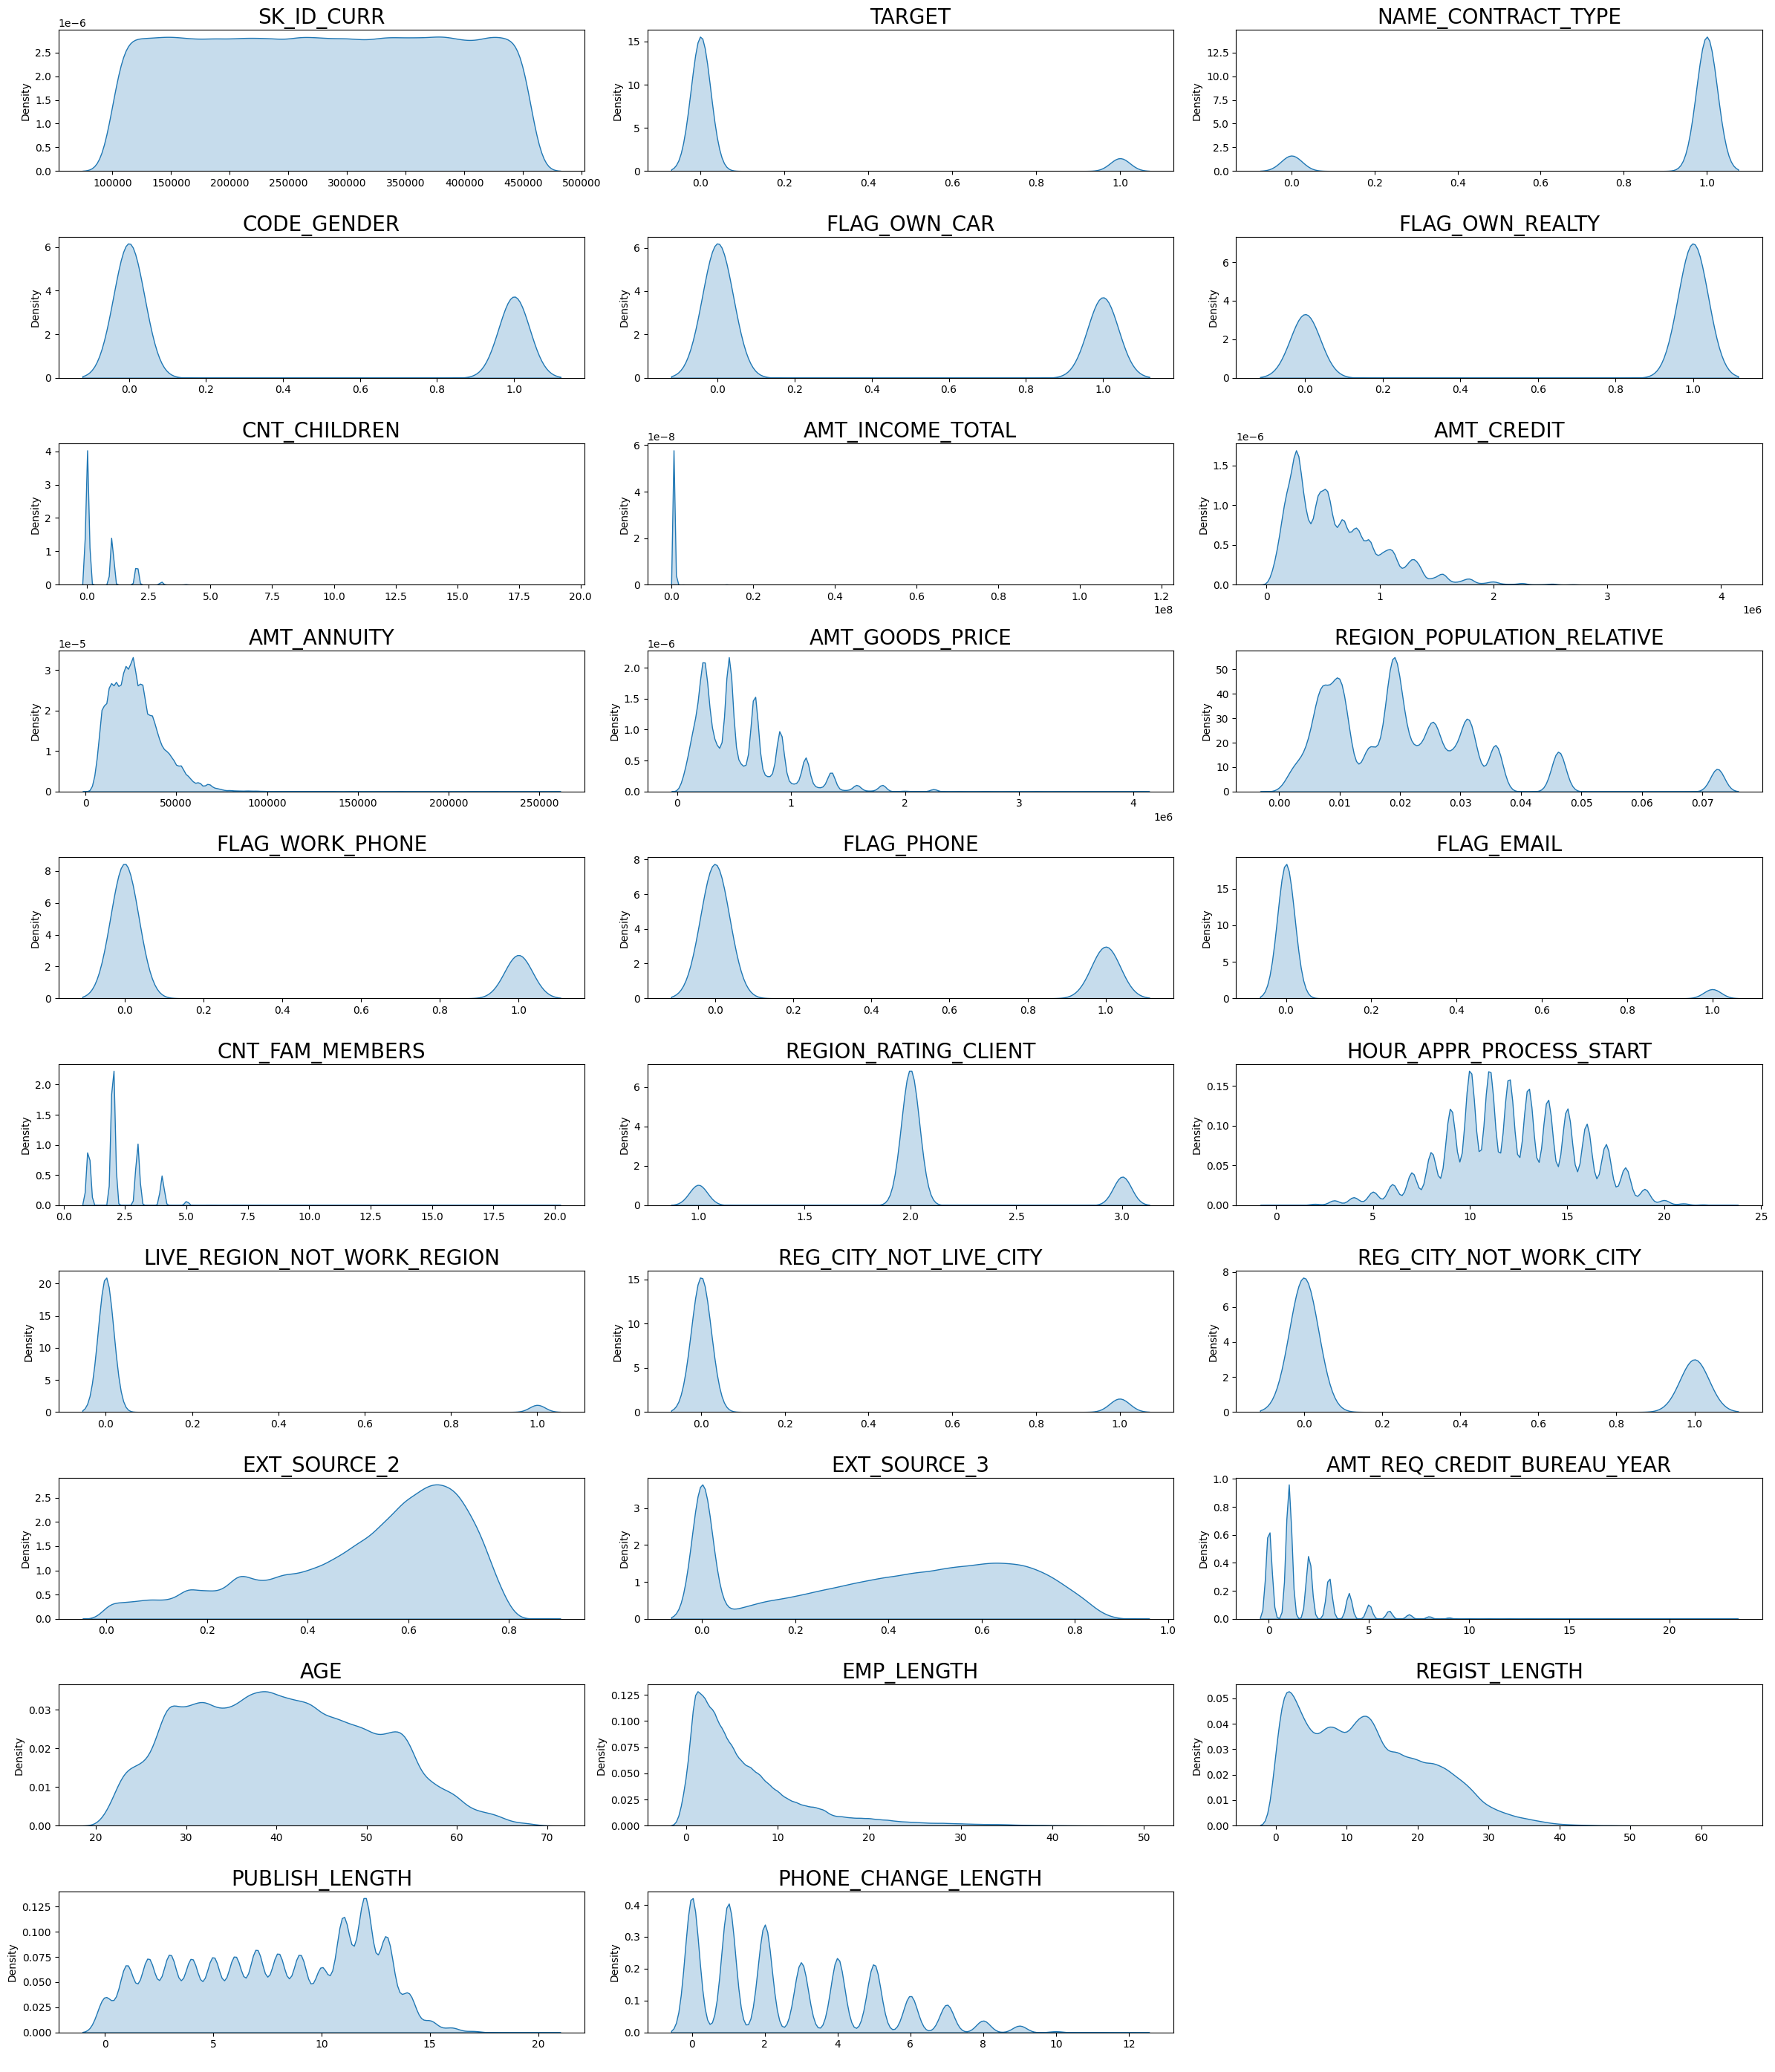

In [22]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,3,i+1)
    sns.kdeplot(x=df_preprocessing[num[i]], palette='magma', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

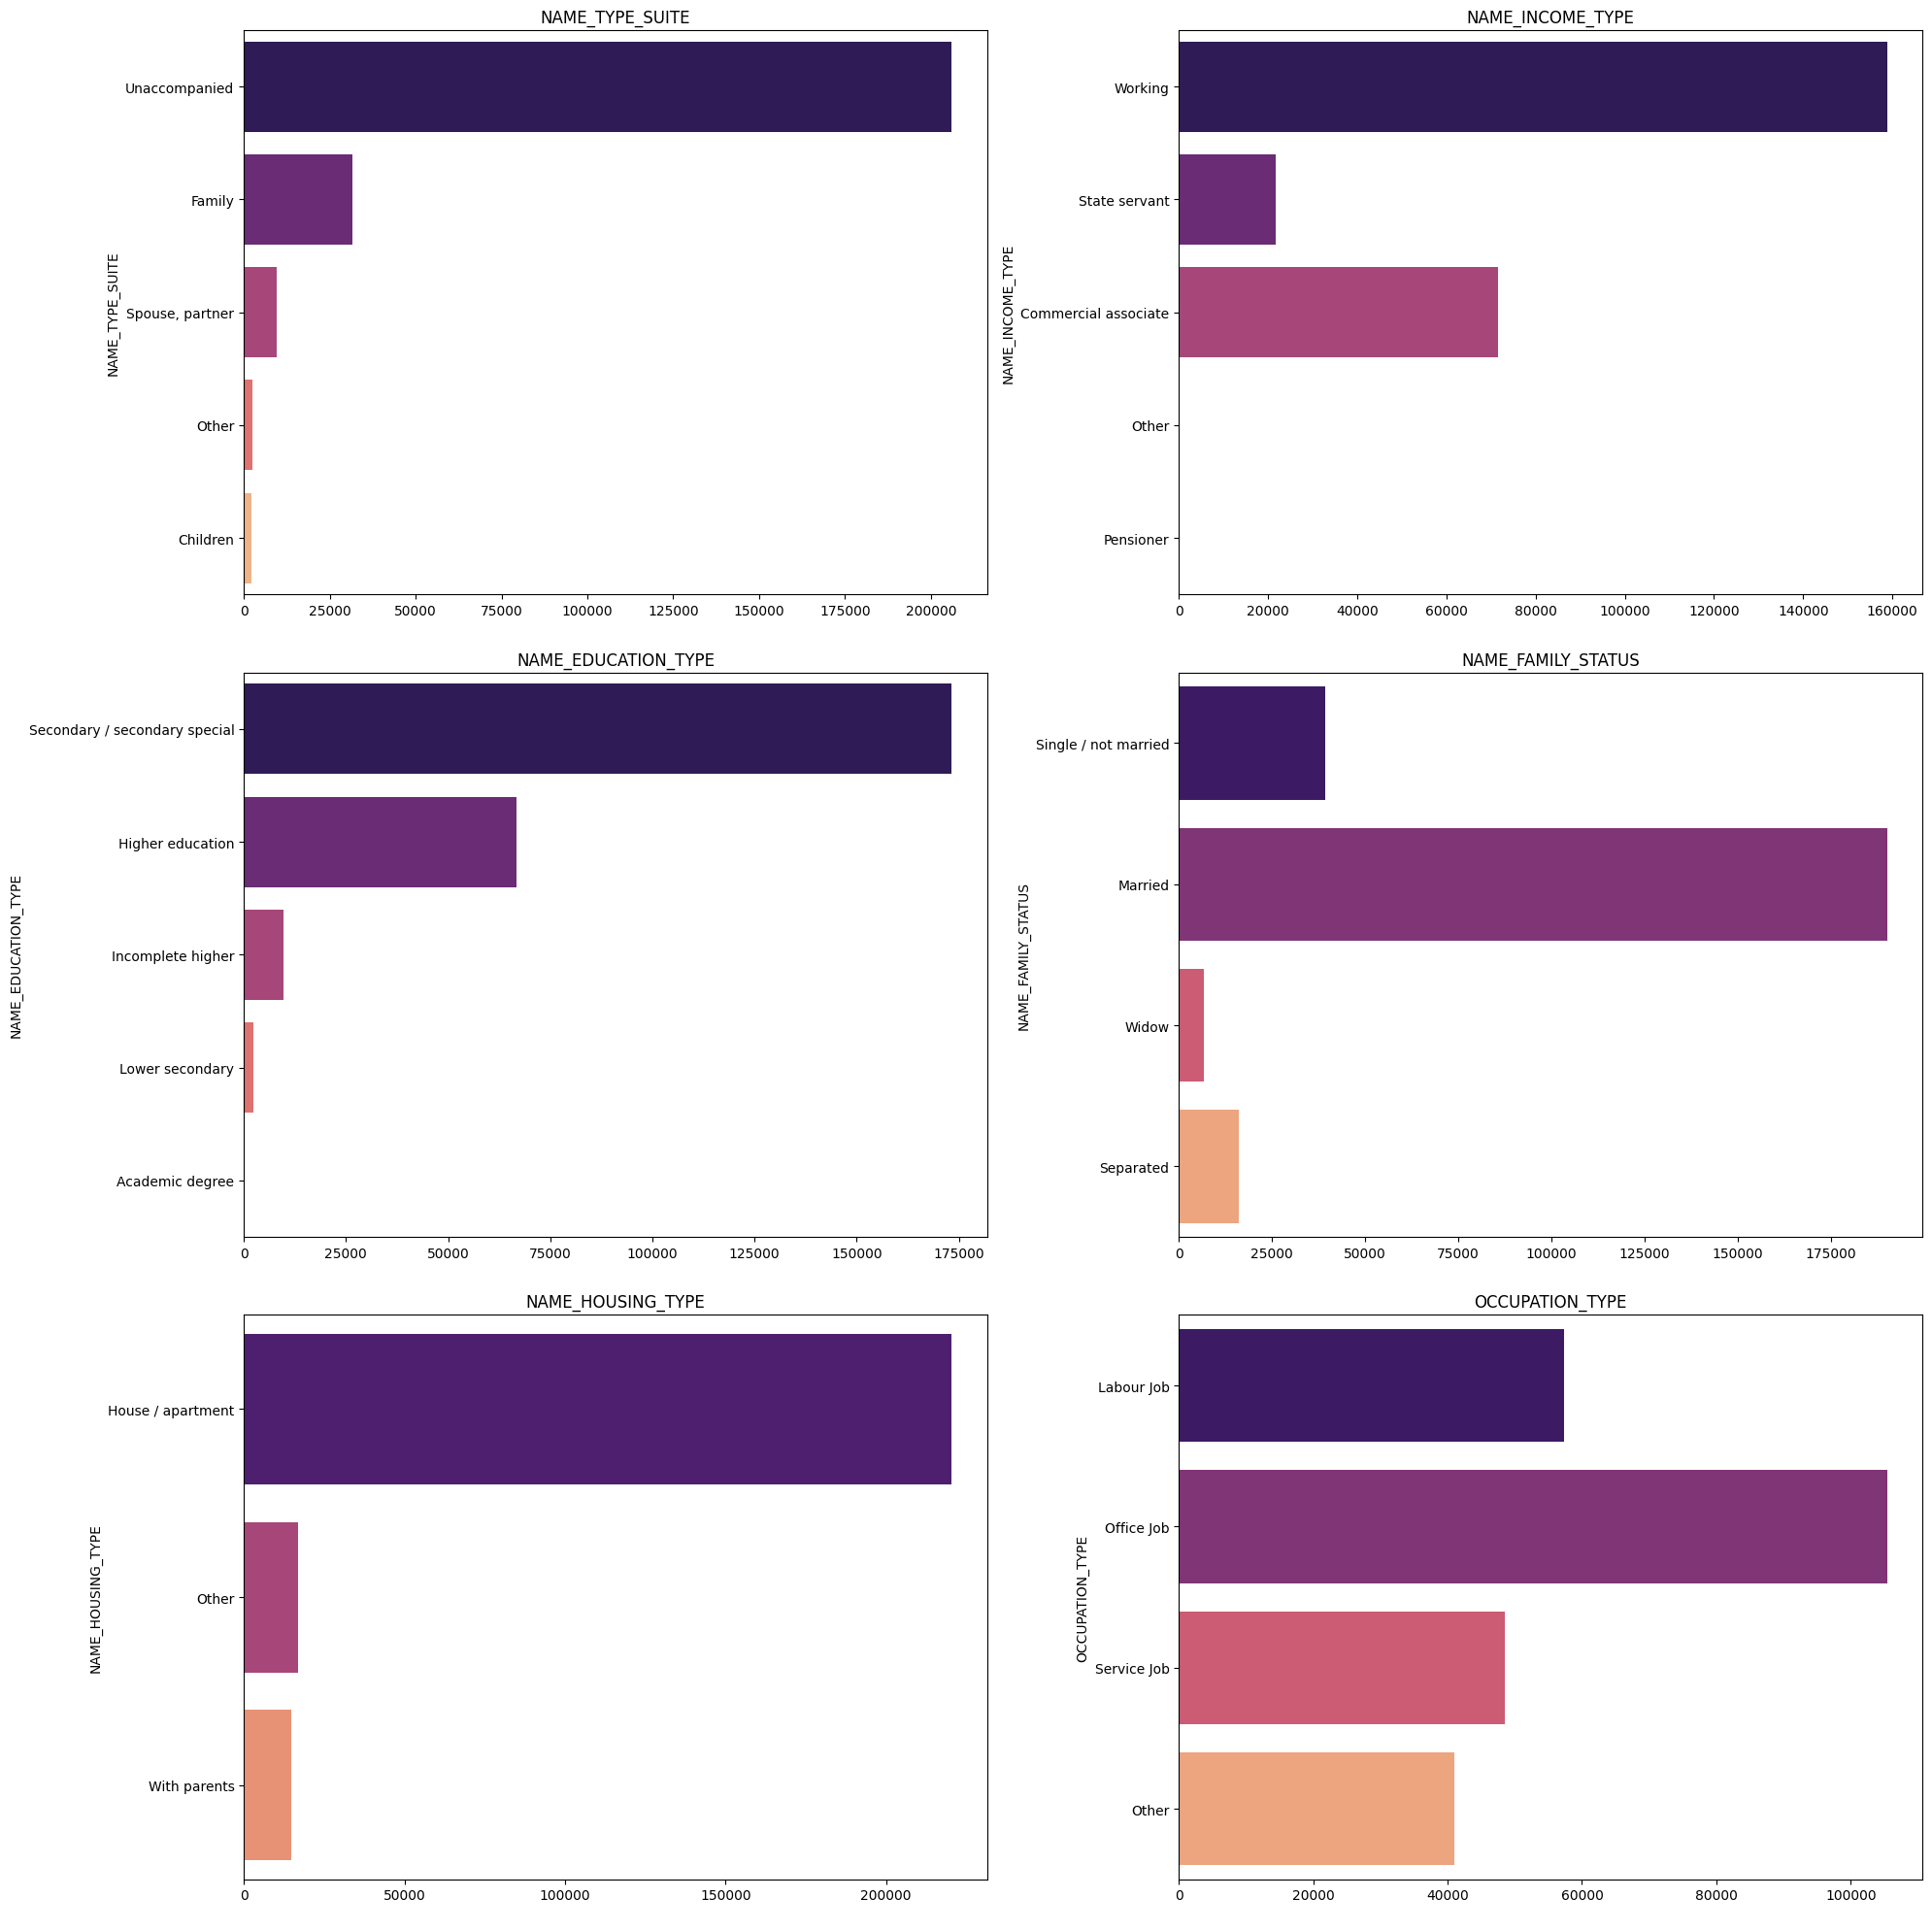

In [23]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], orient = 'h',palette='magma')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

#**Bivariate Analysis**

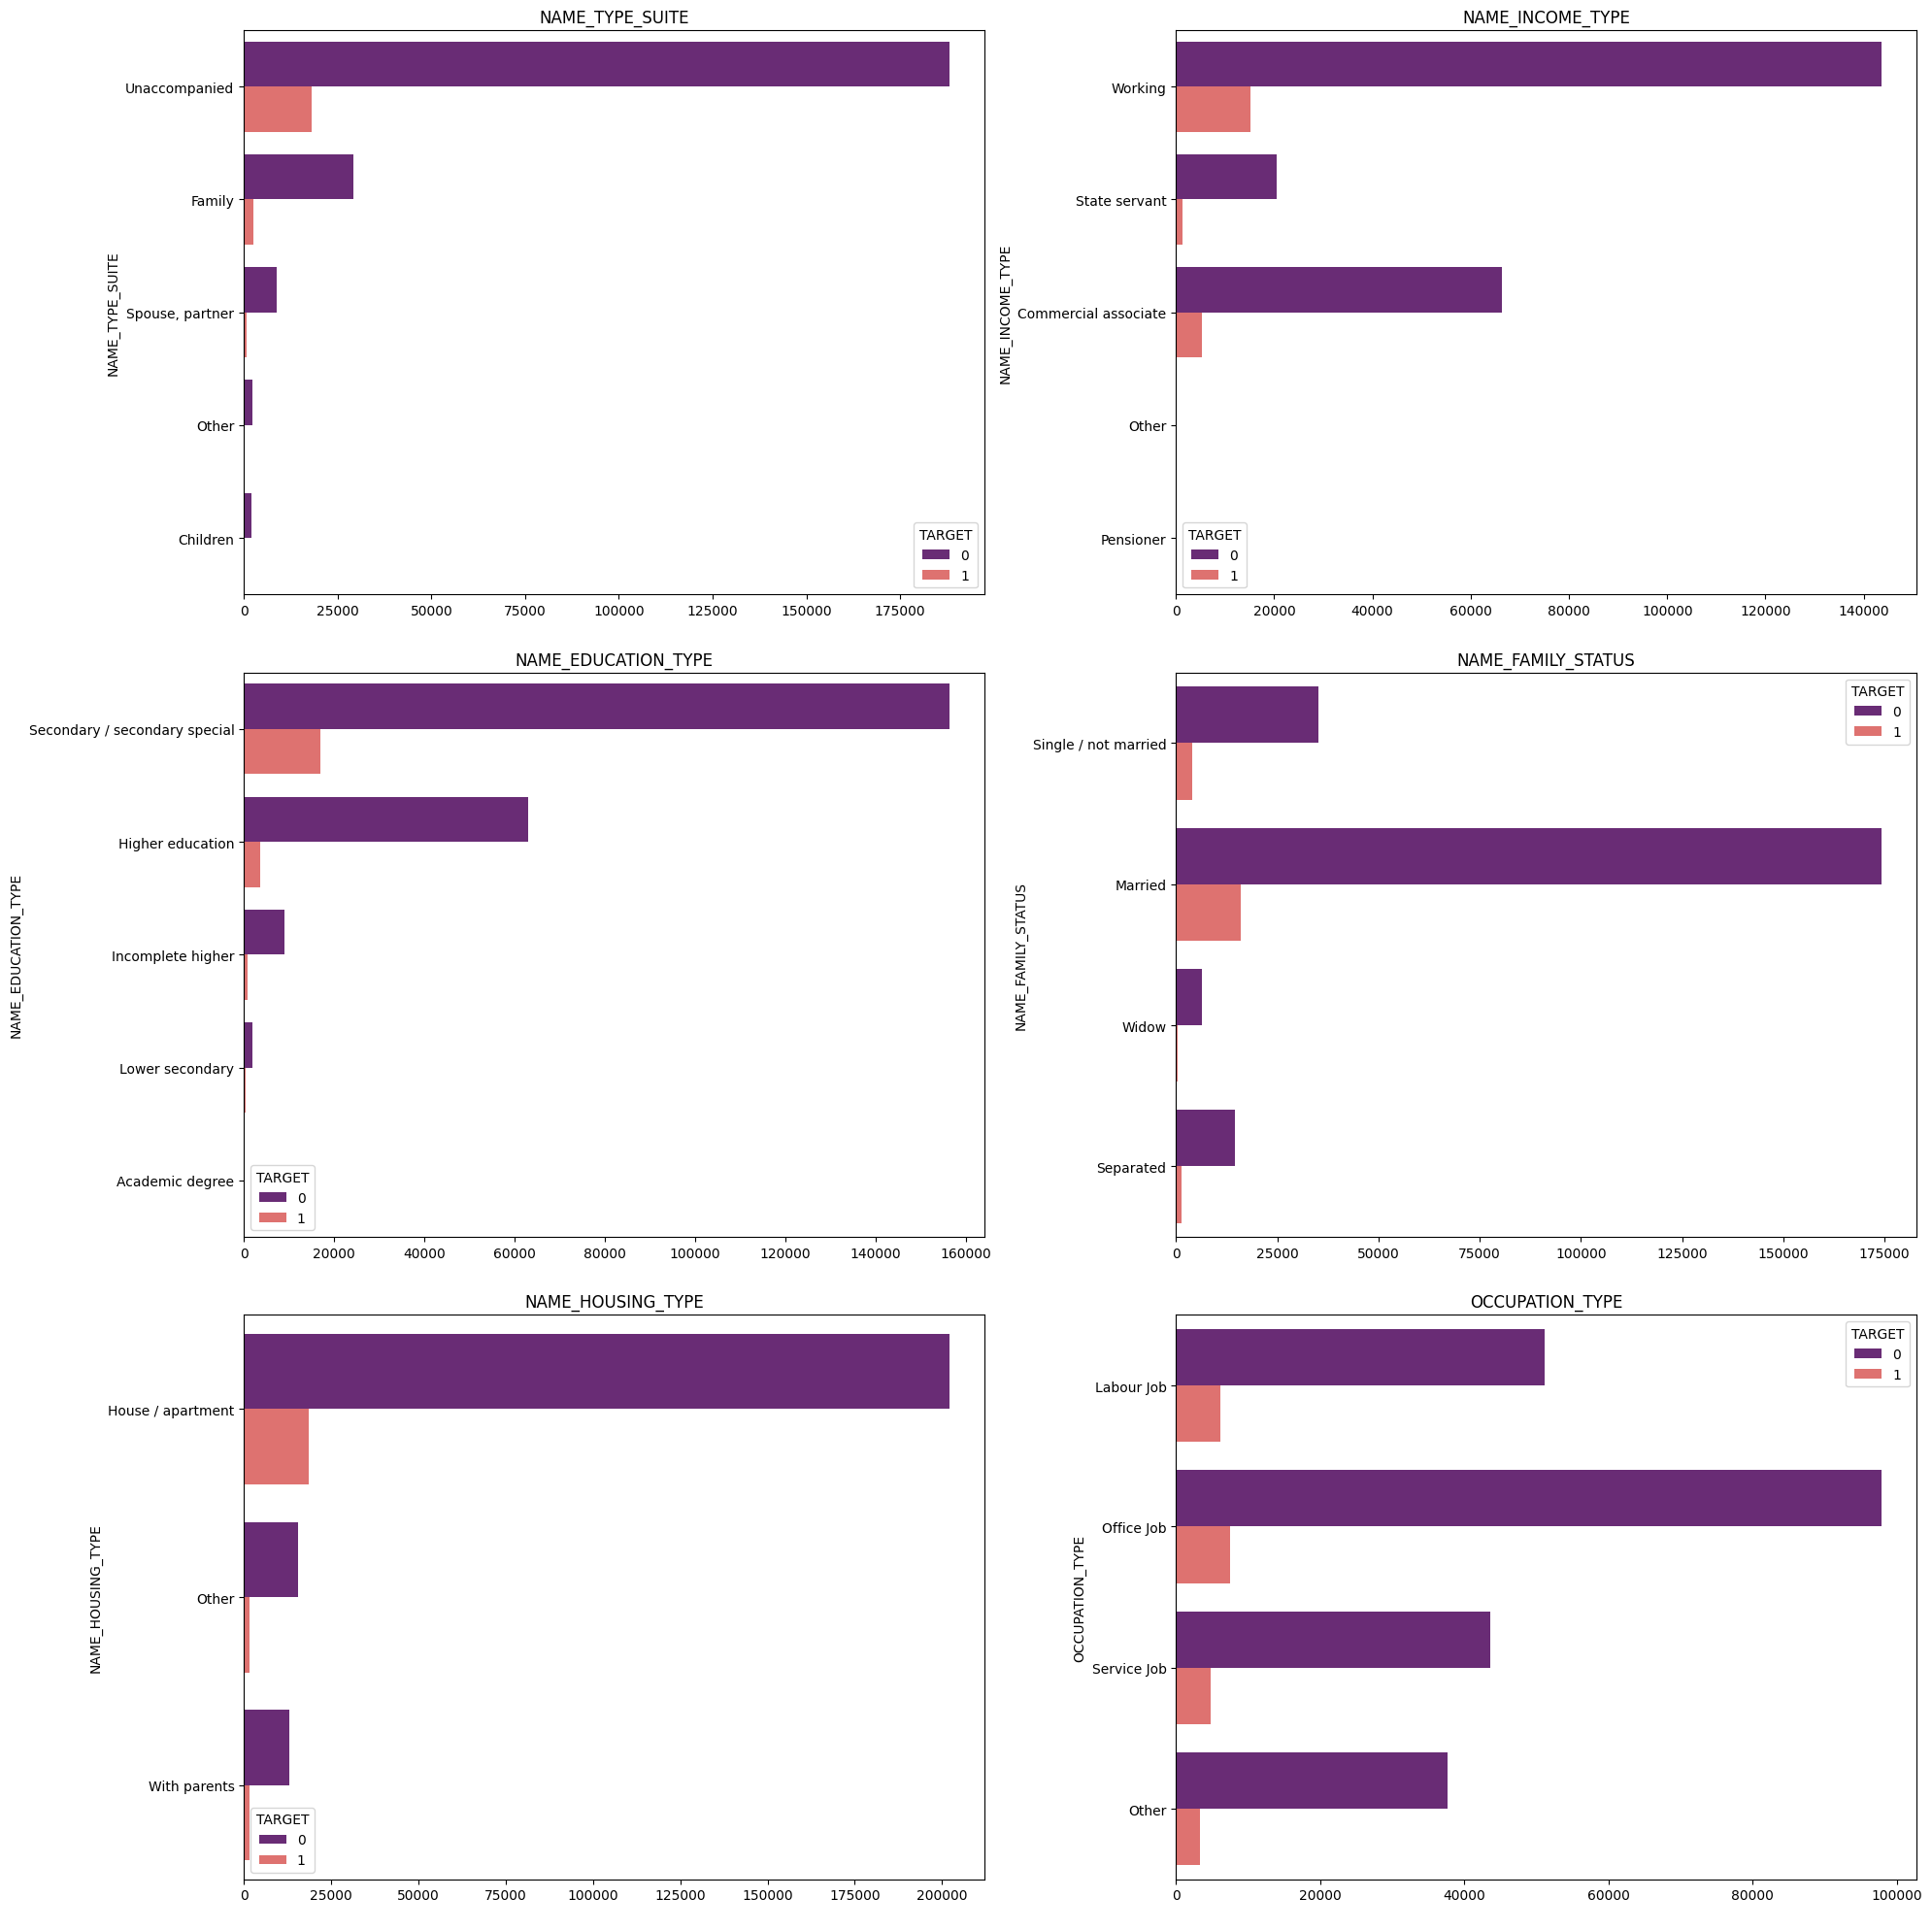

In [24]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], palette='magma', hue=df_eda['TARGET'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

#**Modeling**

##Preparation

In [27]:
df_model = df_preprocessing.copy()
df_model.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             0   
1      100003       0                   1            0             0   
2      100004       0                   0            1             1   
3      100006       0                   1            0             0   
4      100007       0                   1            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY EXT_SOURCE_2  \
0  ...                       0                      0     0.262949   
1  ...                       0                      0     0.622246   
2  ...                       0                      0     0.555912   
3  ...                       0                      0     0.650442   
4  ...                       0                      1     0.322738   

  EXT_SOURCE_3 AMT_REQ_CREDIT_BUREAU_YEAR   AGE  EMP_LENGTH  REGIST_LENGTH  \
0     0.139376                        1.0  26.0         2.0           10.0   
1     0.000000                        0.0  46.0         3.0            3.0   
2     0.729567                        0.0  52.0         1.0           12.0   
3     0.000000                        1.0  52.0         8.0           27.0   
4     0.000000                        0.0  55.0         8.0           12.0   

   PUBLISH_LENGTH  PHONE_CHANGE_LENGTH  
0             6.0                  3.0  
1             1.0                  2.0  
2             7.0                  2.0  
3             7.0                  2.0  
4             9.0                  3.0  

[5 rows x 35 columns]

In [28]:
cat = df_model.select_dtypes(include=['object']).columns.tolist()
num = df_model.select_dtypes(exclude=['object']).columns.tolist()

print('categorical variable :', cat)
print('numerical variable :', num)

categorical variable : ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
numerical variable : ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'EMP_LENGTH', 'REGIST_LENGTH', 'PUBLISH_LENGTH', 'PHONE_CHANGE_LENGTH']


In [29]:
#Feature Engineering
target_encoded = pd.get_dummies(df_model.drop(['TARGET'], axis=1))
target_encoded['TARGET']= df_model['TARGET']
target_encoded.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   1            1             0                1   
1      100003                   1            0             0                0   
2      100004                   0            1             1                1   
3      100006                   1            0             0                1   
4      100007                   1            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ...  NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
0  ...                                        1                         0   
1  ...                                        0                         0   
2  ...                                        1                         0   
3  ...                                        0                         0   
4  ...                                        1                         0   

   NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_Other  \
0                                    1                        0   
1                                    1                        0   
2                                    1                        0   
3                                    1                        0   
4                                    1                        0   

   NAME_HOUSING_TYPE_With parents  OCCUPATION_TYPE_Labour Job  \
0                               0                           1   
1                               0                           0   
2                               0                           1   
3                               0                           1   
4                               0                           0   

   OCCUPATION_TYPE_Office Job  OCCUPATION_TYPE_Other  \
0                           0                      0   
1                           1                      0   
2                           0                      0   
3                           0                      0   
4                           1                      0   

   OCCUPATION_TYPE_Service Job  TARGET  
0                            0       1  
1                            0       0  
2                            0       0  
3                            0       0  
4                            0       0  

[5 rows x 55 columns]

In [30]:
target_encoded["TARGET"].unique()

array([1, 0])

In [31]:
#Split Data
from sklearn.model_selection import train_test_split 

X = target_encoded.drop(['TARGET'], axis = 1)
y = target_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.20)

<Axes: title={'center': 'Count (Target)'}>

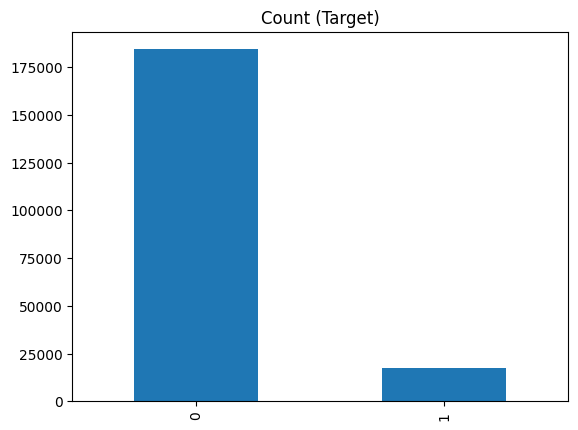

In [32]:
#Balancing Dataset
y_train.value_counts().plot(kind = 'bar', title='Count (Target)')

After Sampling Data:
0    184246
1    184246
Name: TARGET, dtype: int64


<Axes: title={'center': 'Count (Target)'}>

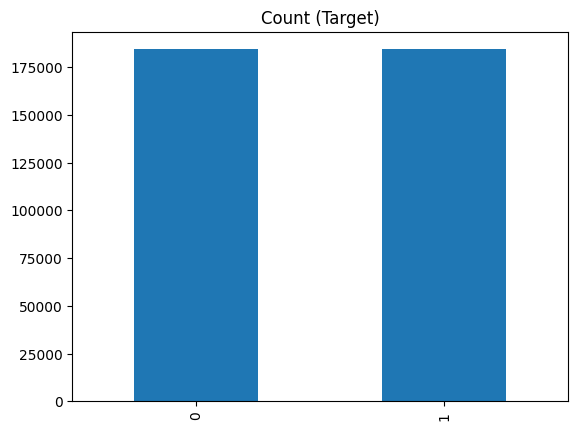

In [33]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

print('After Sampling Data:')
print(y_train.value_counts())

y_train.value_counts().plot(kind = 'bar', title='Count (Target)')

In [34]:
#Standarisasi
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.4f" % auc(fpr, tpr))

def built_in_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

##Logistic Regression

In [36]:
# Model train menggunakan logistic regression
from sklearn.linear_model import LogisticRegression

# Membuat instance dari model
logreg = LogisticRegression() 

# Training model
logreg.fit(X_train,y_train) 

# melakukan proses prediksi
y_pred = logreg.predict(X_test)

print(eval_classification(logreg, y_pred, X_train, y_train, X_test, y_test))

Accuracy (Test Set): 0.9125
Precision (Test Set): 0.3409
Recall (Test Set): 0.0103
F1-Score (Test Set): 0.0200
AUC: 0.5042
None


In [37]:
# Menampilkan confusion matrix dan iris menjadi 4 bagian

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[45969    87]
 [ 4327    45]]

True Positives(TP) =  45969

True Negatives(TN) =  45

False Positives(FP) =  87

False Negatives(FN) =  4327


<Axes: >

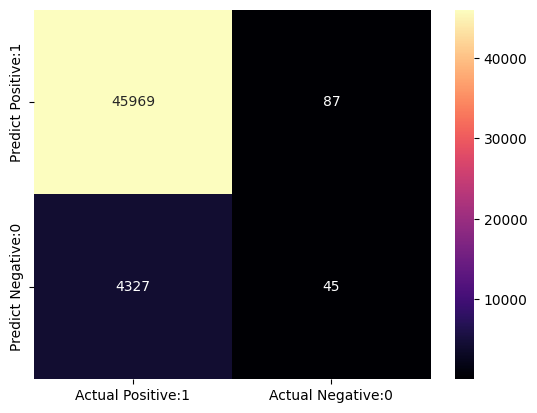

In [38]:
# visualisasi confusion matrix dengan seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'], 
                                 index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'magma')

##Gradient Boosting

In [39]:
from xgboost import XGBClassifier

# Membuat instance dari model
xg = XGBClassifier(random_state = 50)

# Training model. 
xg.fit(X_train, y_train)

# Melakukan proses prediksi 
y_pred = xg.predict(X_test)

print(eval_classification(xg, y_pred, X_train, y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.9130
Precision (Test Set): 0.4740
Recall (Test Set): 0.0313
F1-Score (Test Set): 0.0588
AUC: 0.5140
None


<Axes: >

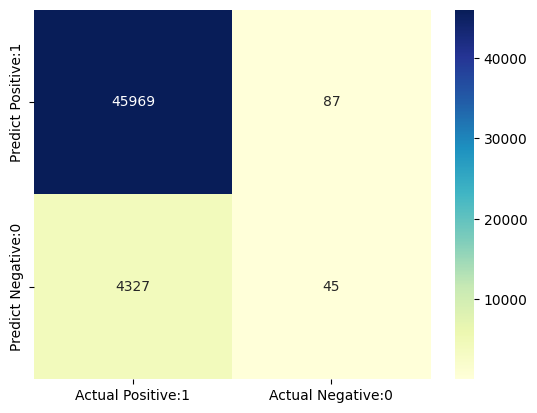

In [40]:
# visualisasi confusion matrix dengan seaborn heatmap
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'], 
                                 index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     46056
           1       0.47      0.03      0.06      4372

    accuracy                           0.91     50428
   macro avg       0.69      0.51      0.51     50428
weighted avg       0.88      0.91      0.88     50428



In [42]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Classification accuracy : 0.9125
Classification Error : 0.0875
Precision : 0.9981
Recall or Sensitivity or TPR : 0.9140


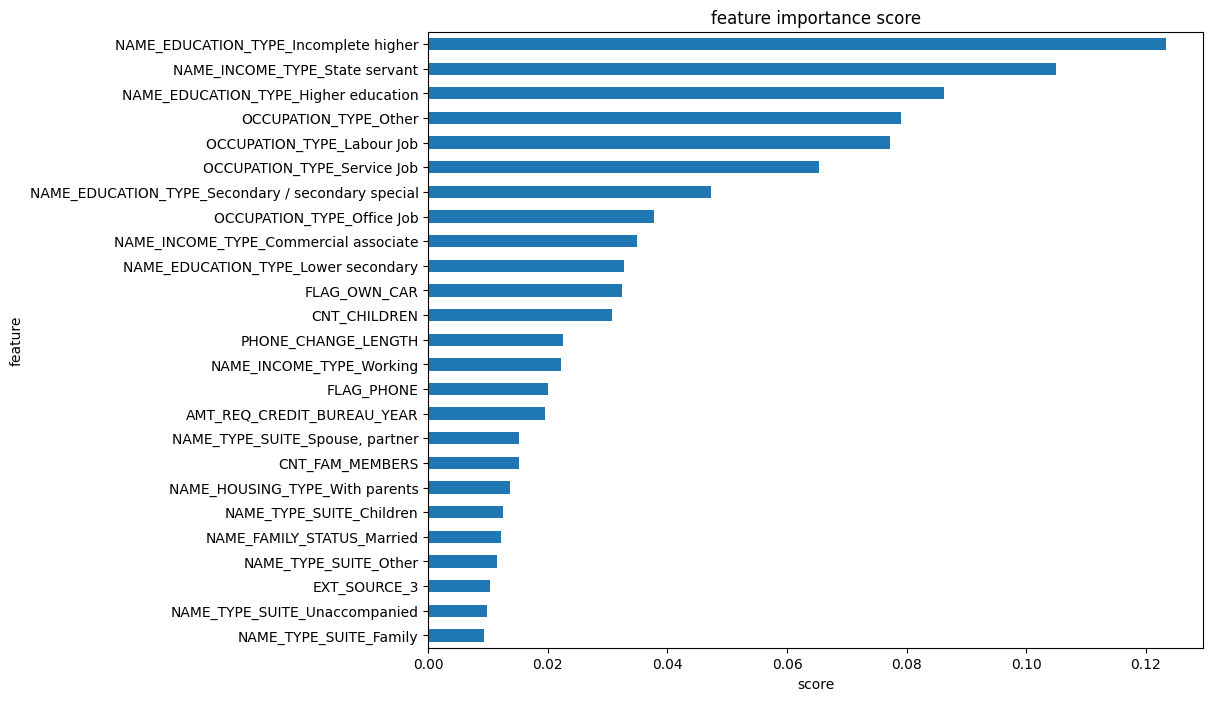

In [43]:
built_in_feature_importance(xg)

#**Insight**

In [44]:
df_model['OCCUPATION_TYPE'].value_counts()

Office Job     105381
Labour Job      57279
Service Job     48458
Other           41019
Name: OCCUPATION_TYPE, dtype: int64

In [45]:
df_model['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    173286
Higher education                  66669
Incomplete higher                  9757
Lower secondary                    2287
Academic degree                     138
Name: NAME_EDUCATION_TYPE, dtype: int64

In [46]:
df_model['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
State servant            21703
Other                       33
Pensioner                   10
Name: NAME_INCOME_TYPE, dtype: int64

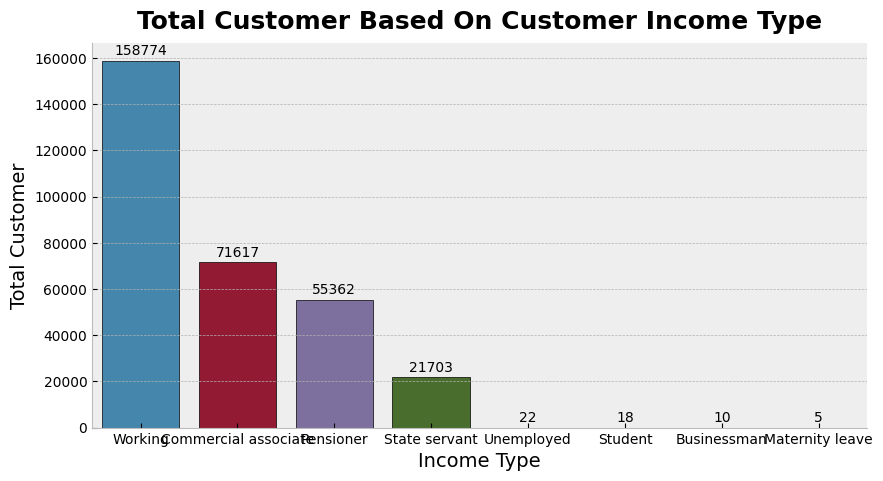

In [51]:
# jenis pendapatan customer
income_type_vis = df_model.groupby('NAME_INCOME_TYPE').agg(num_customer = ('SK_ID_CURR','count')).reset_index().sort_values('num_customer',ascending = False)
income_type_vis= income_type_vis.sort_values('num_customer',ascending = False)

# Visualisasi
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Total Customer Based On Customer Income Type", fontsize=18, color='black', weight='bold',pad = 10)
sns.barplot(x='NAME_INCOME_TYPE', y='num_customer', data=income_type_vis, edgecolor='black')
plt.bar_label(ax.containers[0], padding=2)
plt.xlabel('Income Type', fontsize=14)
plt.ylabel('Total Customer', fontsize=14)
sns.despine()

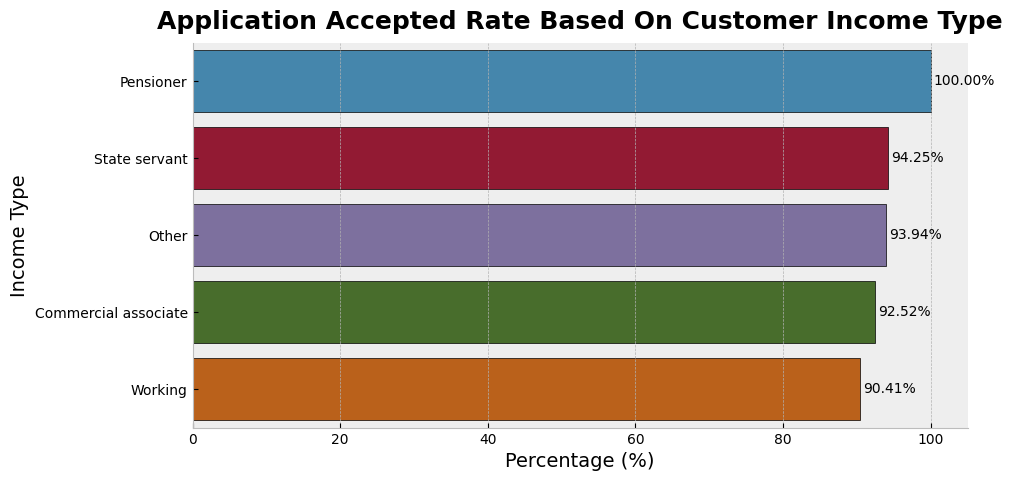

In [54]:
app_acc_income_type = df_model.groupby(['NAME_INCOME_TYPE','TARGET']).agg(num_customer = ('SK_ID_CURR','count')).reset_index()
total_cust = app_acc_income_type.groupby('NAME_INCOME_TYPE').agg(total_customer = ('num_customer','sum')).reset_index()
app_acc_income_type_merge = app_acc_income_type.merge(total_cust,on = ['NAME_INCOME_TYPE'])
app_acc_income_type_merge['percentage'] = round(app_acc_income_type_merge['num_customer']/app_acc_income_type_merge['total_customer']*100, 2)
app_acc_income_type_merge = app_acc_income_type_merge.sort_values('percentage',ascending = False)
result_groupby_acc = app_acc_income_type_merge[(app_acc_income_type_merge['TARGET'] == 0)]

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Application Accepted Rate Based On Customer Income Type", fontsize=18, color='black', weight='bold',pad = 10)
sns.barplot(y='NAME_INCOME_TYPE', x='percentage', data=result_groupby_acc, edgecolor='black')
plt.bar_label(ax.containers[0], padding=2,fmt='%.2f%%')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Income Type', fontsize=14)
sns.despine()

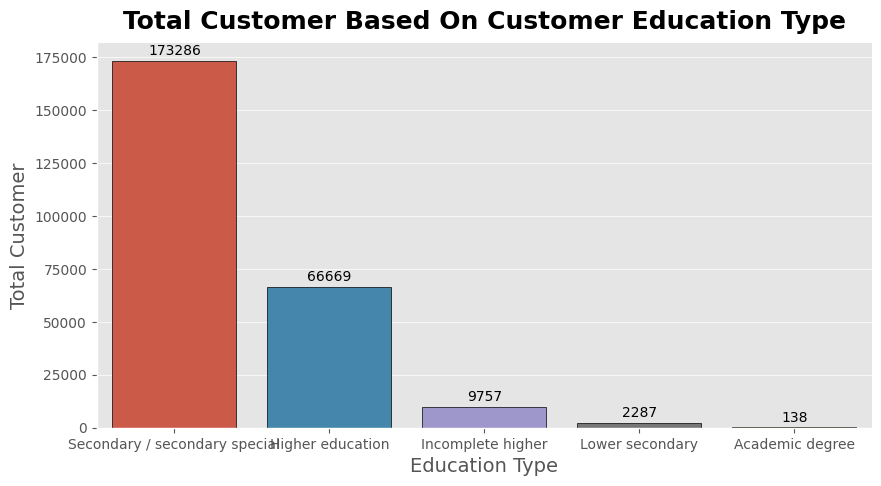

In [56]:
# Jenis pendidikan customer
income_type_vis = df_model.groupby('NAME_EDUCATION_TYPE').agg(num_customer = ('SK_ID_CURR','count')).reset_index().sort_values('num_customer',ascending = False)
income_type_vis= income_type_vis.sort_values('num_customer',ascending = False)

# Visualization
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Total Customer Based On Customer Education Type", fontsize=18, color='black', weight='bold',pad = 10)
sns.barplot(x='NAME_EDUCATION_TYPE', y='num_customer', data=income_type_vis, edgecolor='black')
plt.bar_label(ax.containers[0], padding=2)
plt.xlabel('Education Type', fontsize=14)
plt.ylabel('Total Customer', fontsize=14)
sns.despine()

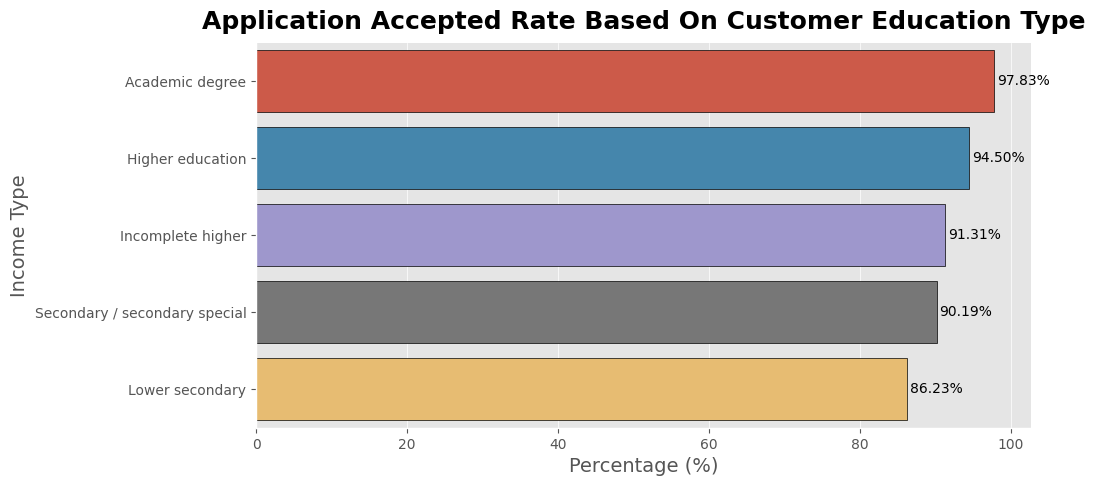

In [57]:
app_acc_income_type = df_model.groupby(['NAME_EDUCATION_TYPE','TARGET']).agg(num_customer = ('SK_ID_CURR','count')).reset_index()
total_cust = app_acc_income_type.groupby('NAME_EDUCATION_TYPE').agg(total_customer = ('num_customer','sum')).reset_index()
app_acc_income_type_merge = app_acc_income_type.merge(total_cust,on = ['NAME_EDUCATION_TYPE'])
app_acc_income_type_merge['percentage'] = round(app_acc_income_type_merge['num_customer']/app_acc_income_type_merge['total_customer']*100, 2)
app_acc_income_type_merge = app_acc_income_type_merge.sort_values('percentage',ascending = False)
result_groupby_acc = app_acc_income_type_merge[(app_acc_income_type_merge['TARGET'] == 0)]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Application Accepted Rate Based On Customer Education Type", fontsize=18, color='black', weight='bold',pad = 10)
sns.barplot(y='NAME_EDUCATION_TYPE', x='percentage', data=result_groupby_acc, edgecolor='black')
plt.bar_label(ax.containers[0], padding=2,fmt='%.2f%%')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Income Type', fontsize=14)
sns.despine()